#### Gráficos descriptivos del dataset

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, time

# Cargar dataset
#DATA_PATH = "../final/ico_dataset_preico_feature_engineering.csv"
DATA_PATH = "../final/ico_dataset_final_v2_clean_enriquecido_feature_engineering_preico_v1.csv"
df = pd.read_csv(DATA_PATH)

# Estilo
sns.set(style="whitegrid", palette="viridis", font_scale=1.1)

[0.0222222222222222, nan, nan, nan, 0.002, 0.009381816322821, 0.1224489795918367, 0.1666666666666666, 0.2, 0.2, 0.2985074626865671, 0.3333333333333333, 0.3787878787878788, 0.4, 0.4761904761904761, 0.5, 0.51440329218107, 0.5196294662549625, 1.0, nan, 1.0, nan, 0.625, 1.0, nan, nan, nan, nan, nan, 0.6976744186046512, 1.0, nan, nan, 1.0, 2.4316239316239314, nan, 0.0, nan, 0.0, 0.006001861563259, 0.006166550068017, 0.007, 0.01, 0.01, 0.0333333333333333, 0.04, 0.0423349800698708, 0.0666666666666666, 0.0853658536585365, 0.1, 0.1, 0.1511627906976744, 0.2, 0.3, 1.0, nan, 0.2781954887218045, 0.4, 0.4563245869401762, 0.5263157894736842, 0.6, 1.0, 3.333333333333333, nan, nan, 1.0, nan, 1.0, nan, nan, 0.0, 0.0076010231697304, 0.01, 0.01, 0.0399999996637907, 0.0399999996637907, 0.0490075961774075, 0.0625, 0.1336898395721925, 0.1360544217687075, 0.3333333333333333, nan, 0.0666666666666666, 0.0666666666666666, 0.0666666666666666, 0.1360544217687075, 0.1818181818181818, 0.2, 0.22, 0.2216066481994459, 

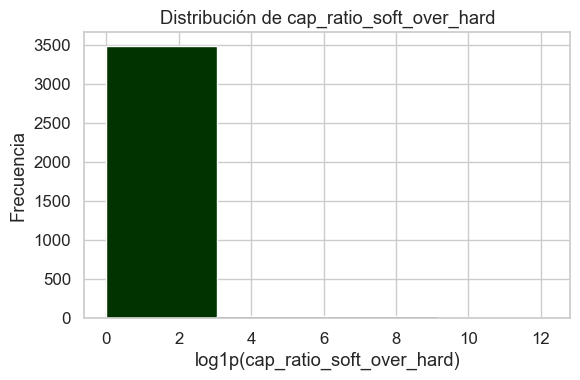

In [24]:
print(sorted(df["cap_ratio_soft_over_hard"]))
for col in ["cap_ratio_soft_over_hard"]:
    if col in df.columns:
        vals = pd.to_numeric(df[col], errors="coerce")
        vals = vals[vals.notna() & (vals>=0)]
        if len(vals) > 0:
            plt.figure(figsize=(6,4))
            plt.hist(np.log1p(vals), bins=4)
            plt.title(f"Distribución de {col}")
            plt.xlabel(f"log1p({col})")
            plt.ylabel("Frecuencia")
            savefig(os.path.join(OUT_DIR, f"fig_hist_log1p_{col}.png"))
            plt.show()

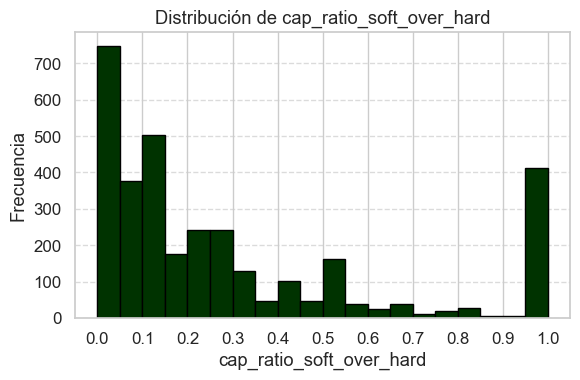

In [25]:
for col in ["cap_ratio_soft_over_hard"]:
    if col in df.columns:
        vals = pd.to_numeric(df[col], errors="coerce")
        vals = vals[vals.notna() & (vals >= 0) & (vals <= 1)]  # filtro para dejar valores entre 0 y 1
        if len(vals) > 0:
            plt.figure(figsize=(6, 4))
            plt.hist(vals, bins=20, range=(0, 1), edgecolor="black")
            plt.title(f"Distribución de {col}")
            plt.xlabel(col)
            plt.ylabel("Frecuencia")
            plt.xticks(np.linspace(0, 1, 11))  # eje x de 0 a 1 con pasos de 0.1
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            savefig(os.path.join(OUT_DIR, f"fig_hist_{col}.png"))
            plt.show()


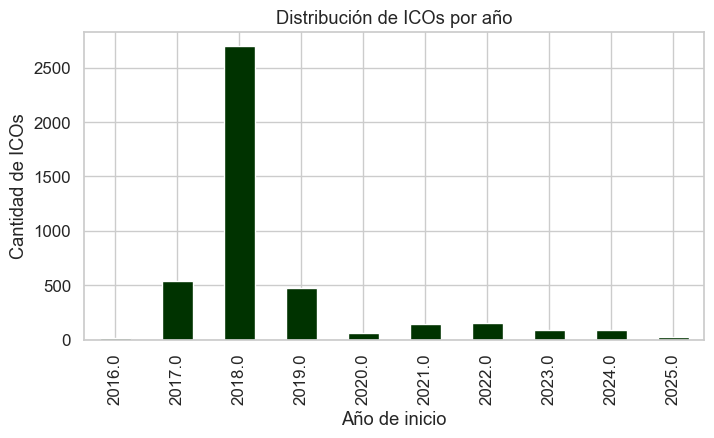

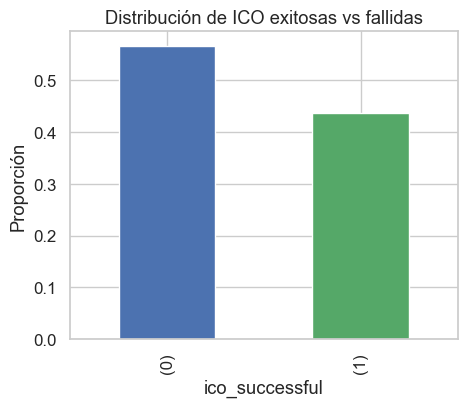

ico_successful
0    2518
1    1939
Name: count, dtype: int64


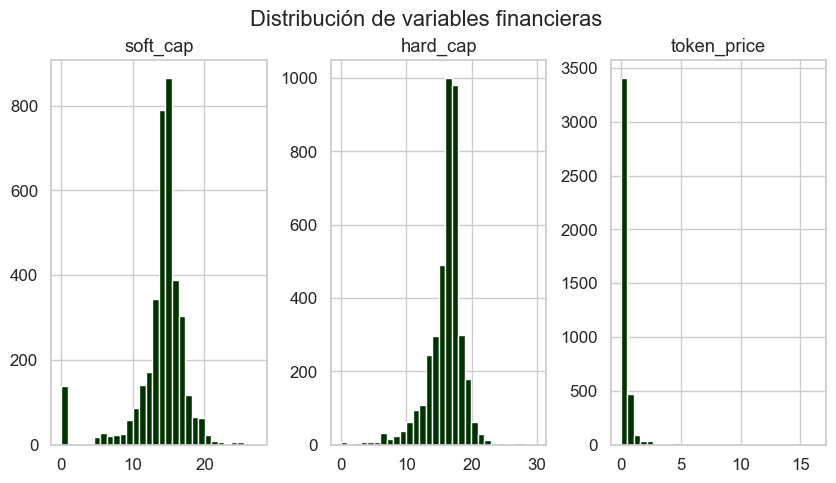

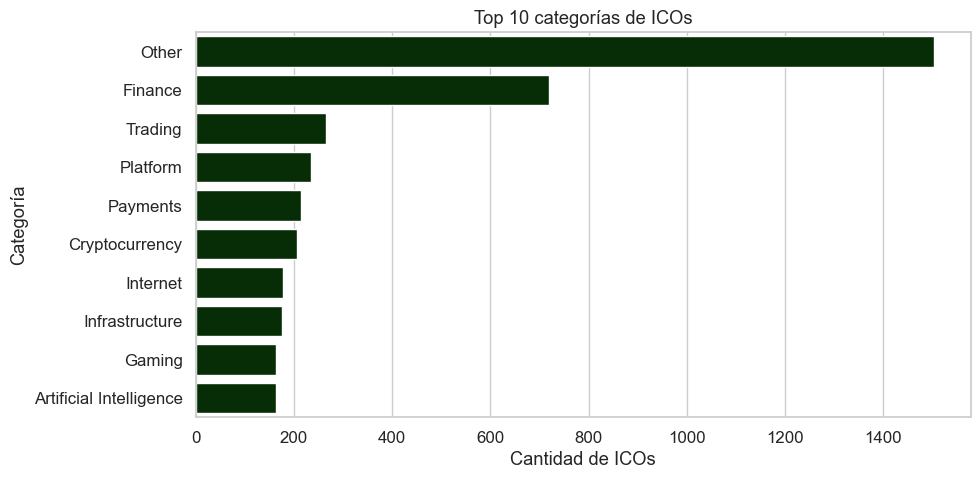

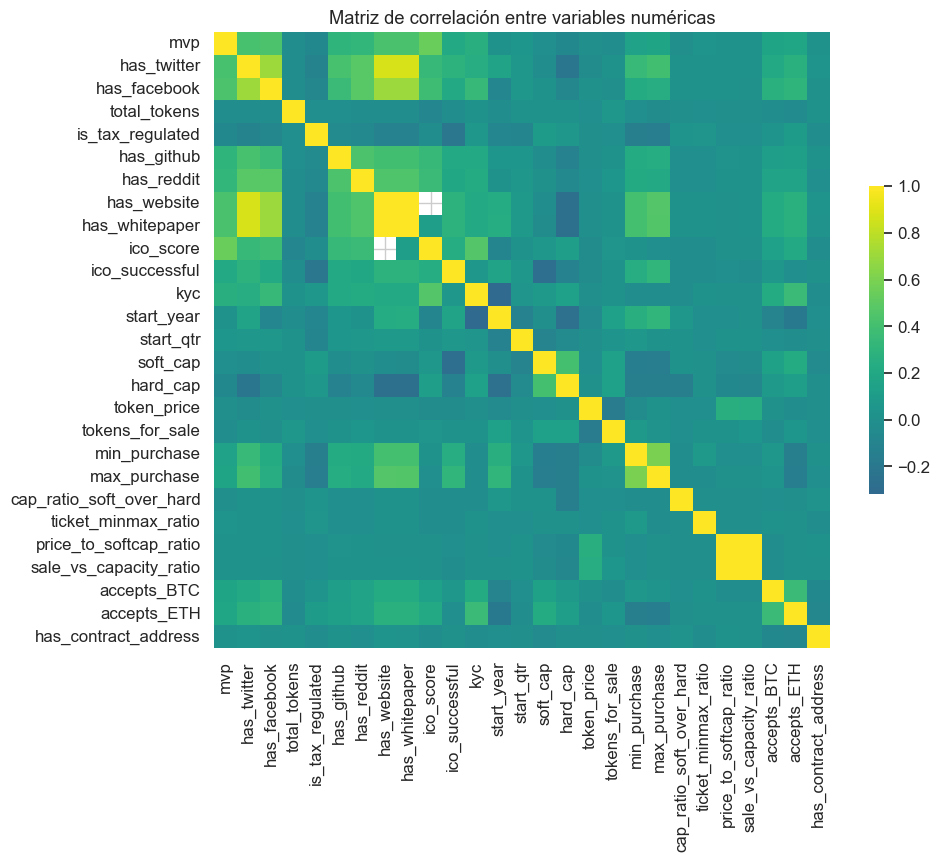

In [12]:

# --- Distribución temporal de las ICO ---
plt.figure(figsize=(8,4))
df['start_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de ICOs por año")
plt.xlabel("Año de inicio")
plt.ylabel("Cantidad de ICOs")
plt.show()

# --- Distribución de ICOs exitosas vs fallidas ---
plt.figure(figsize=(5,4))
df['ico_successful'].value_counts(normalize=True).plot(kind='bar', color=['#4c72b0', '#55a868'])
plt.title("Distribución de ICO exitosas vs fallidas")
plt.xticks(ticks=[0,1], labels=['(0)', '(1)'])
plt.ylabel("Proporción")
plt.show()
print(df['ico_successful'].value_counts())

# --- Distribución de variables financieras clave ---
cols = ['soft_cap', 'hard_cap', 'token_price']
df[cols].hist(bins=30, figsize=(10,5), layout=(1,3))
plt.suptitle("Distribución de variables financieras")
plt.show()

# --- Conteo de ICOs por categoría principal ---
plt.figure(figsize=(10,5))
top_cats = df['category'].value_counts().nlargest(10)
sns.barplot(x=top_cats.values, y=top_cats.index)
plt.title("Top 10 categorías de ICOs")
plt.xlabel("Cantidad de ICOs")
plt.ylabel("Categoría")
plt.show()

# --- Heatmap de correlaciones numéricas ---
plt.figure(figsize=(10,8))
num_cols = df.select_dtypes(include='number').corr()
sns.heatmap(num_cols, cmap='viridis', center=0, square=True, cbar_kws={'shrink':0.5})
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


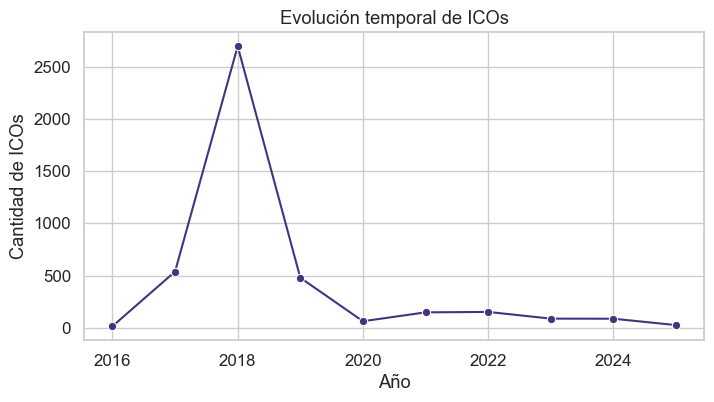

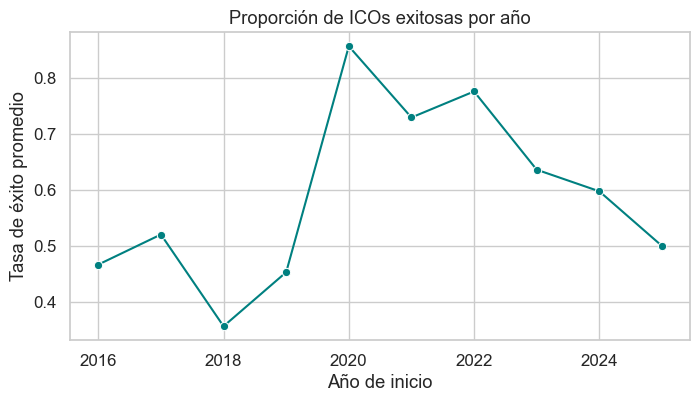

C:\Users\dmigl\AppData\Local\Temp\ipykernel_11184\1587517840.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_country["success_rate"], y=df_country.index, palette="crest")


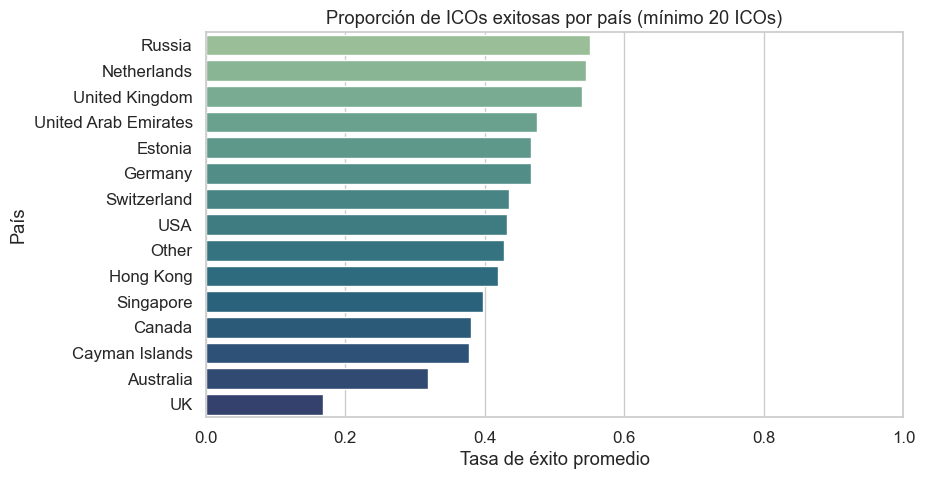

C:\Users\dmigl\AppData\Local\Temp\ipykernel_11184\1587517840.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_industry["success_rate"], y=df_industry.index, palette="mako")


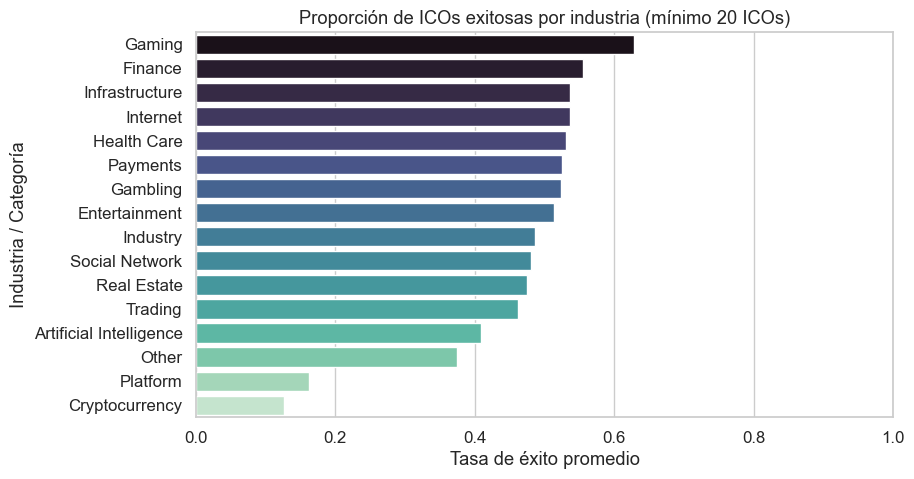

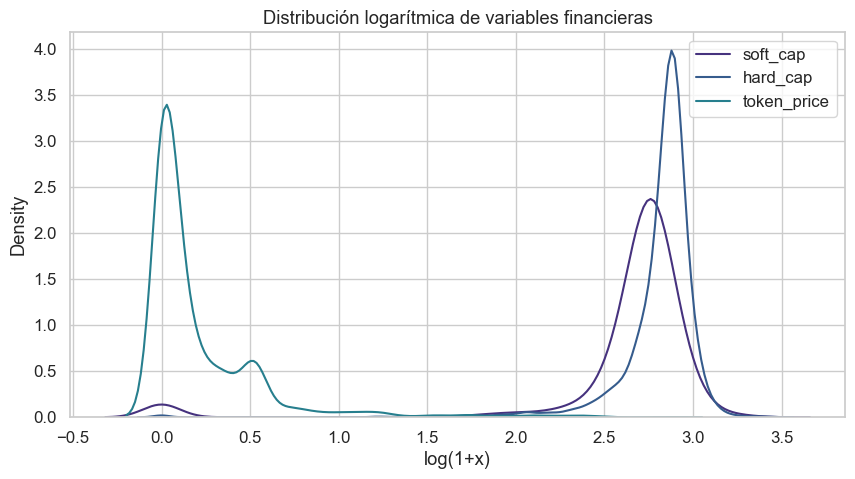

C:\Users\dmigl\AppData\Local\Temp\ipykernel_11184\1587517840.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ico_successful', y=np.log1p(df['hard_cap']), data=df, palette="viridis")


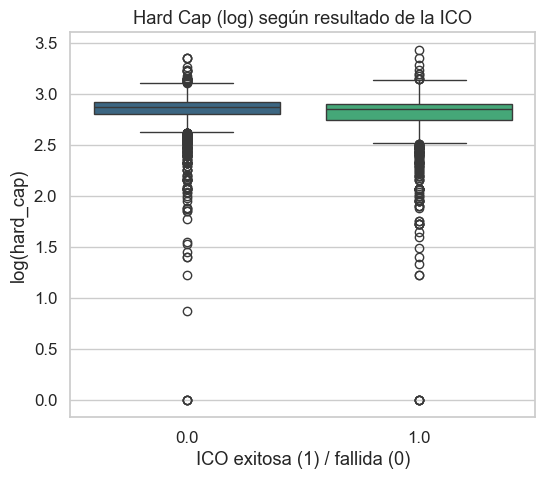

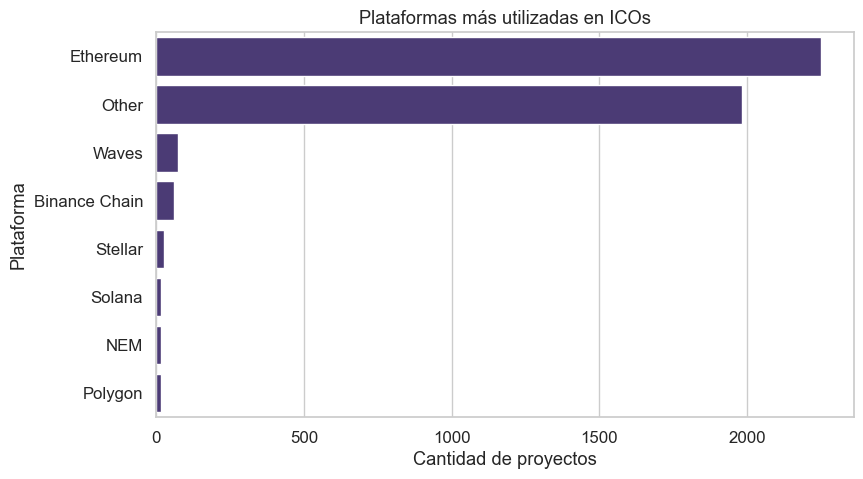

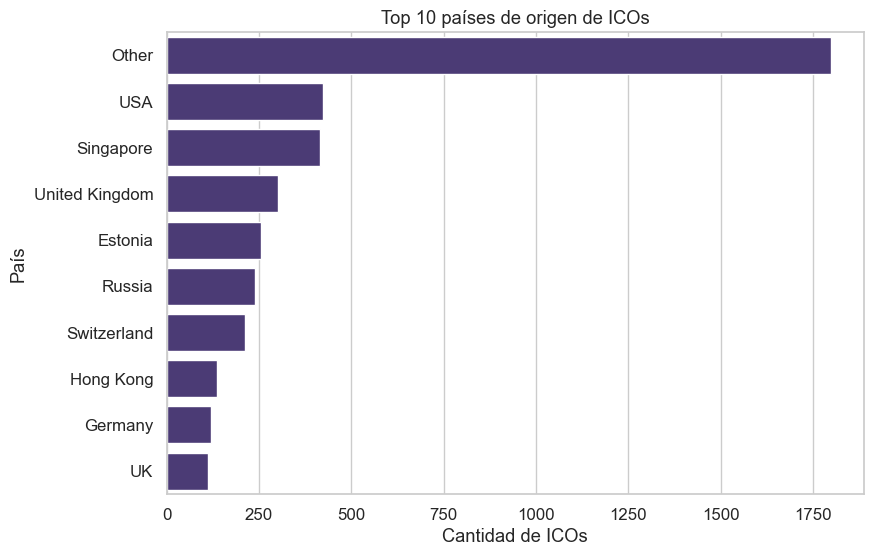

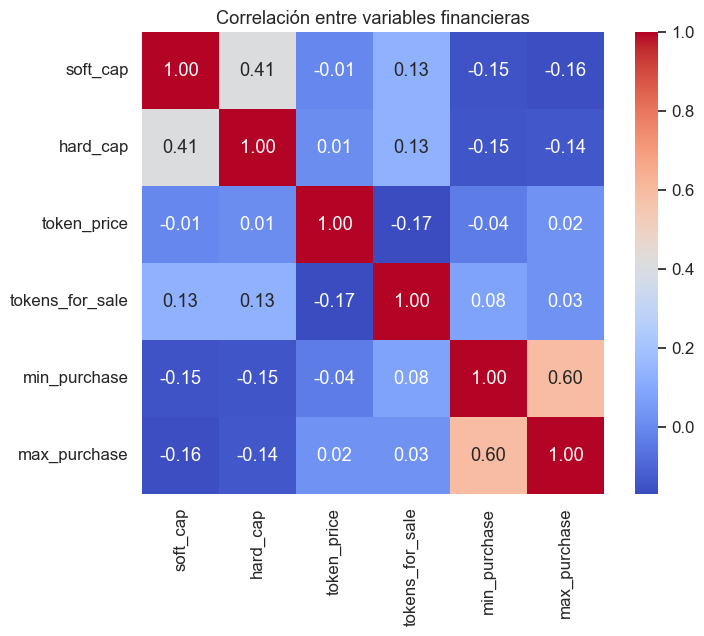

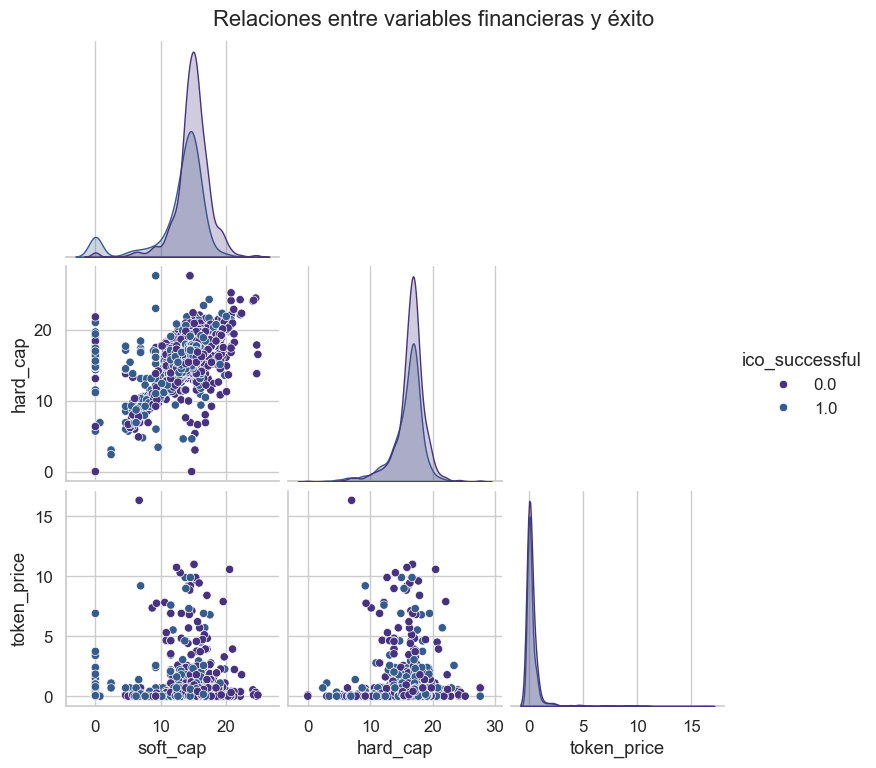

In [3]:

# --- 1️⃣ Distribución temporal de ICOs (ya la tenías, pero ahora suavizada) ---
plt.figure(figsize=(8,4))
sns.lineplot(x=df['start_year'].value_counts().sort_index().index,
             y=df['start_year'].value_counts().sort_index().values,
             marker="o")
plt.title("Evolución temporal de ICOs")
plt.xlabel("Año")
plt.ylabel("Cantidad de ICOs")
plt.show()

# --- 2️⃣ Proporción de ICOs exitosas por año ---
plt.figure(figsize=(8,4))
df_year = df.groupby('start_year')['ico_successful'].mean().dropna()
sns.lineplot(x=df_year.index, y=df_year.values, marker="o", color="teal")
plt.title("Proporción de ICOs exitosas por año")
plt.xlabel("Año de inicio")
plt.ylabel("Tasa de éxito promedio")
plt.show()

# 🌍 Proporción de ICO exitosas por país
min_icos = 40  # para evitar ruido de países con pocas ICOs
df_country = df.groupby("location").agg(
    total_icos=("ico_successful", "count"),
    success_rate=("ico_successful", "mean")
).query("total_icos >= @min_icos").sort_values("success_rate", ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x=df_country["success_rate"], y=df_country.index, palette="crest")
plt.title("Proporción de ICOs exitosas por país (mínimo 20 ICOs)")
plt.xlabel("Tasa de éxito promedio")
plt.ylabel("País")
plt.xlim(0,1)
plt.show()

# 🏭 Proporción de ICO exitosas por industria
min_icos = 60
df_industry = df.groupby("category").agg(
    total_icos=("ico_successful", "count"),
    success_rate=("ico_successful", "mean")
).query("total_icos >= @min_icos").sort_values("success_rate", ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(x=df_industry["success_rate"], y=df_industry.index, palette="mako")
plt.title("Proporción de ICOs exitosas por industria (mínimo 20 ICOs)")
plt.xlabel("Tasa de éxito promedio")
plt.ylabel("Industria / Categoría")
plt.xlim(0,1)
plt.show()

# --- 3️⃣ Distribución logarítmica de variables financieras ---
plt.figure(figsize=(10,5))
for col in ['soft_cap','hard_cap','token_price']:
    sns.kdeplot(np.log1p(df[col].dropna()), label=col)
plt.title("Distribución logarítmica de variables financieras")
plt.xlabel("log(1+x)")
plt.legend()
plt.show()

# --- 4️⃣ Relación entre hard_cap y éxito ---
plt.figure(figsize=(6,5))
sns.boxplot(x='ico_successful', y=np.log1p(df['hard_cap']), data=df, palette="viridis")
plt.title("Hard Cap (log) según resultado de la ICO")
plt.xlabel("ICO exitosa (1) / fallida (0)")
plt.ylabel("log(hard_cap)")
plt.show()

# --- 5️⃣ Distribución de plataformas más comunes ---
plt.figure(figsize=(9,5))
top_platforms = df['platform'].value_counts().nlargest(8)
sns.barplot(x=top_platforms.values, y=top_platforms.index)
plt.title("Plataformas más utilizadas en ICOs")
plt.xlabel("Cantidad de proyectos")
plt.ylabel("Plataforma")
plt.show()

# --- 6️⃣ Conteo de ICOs por país (location) ---
plt.figure(figsize=(9,6))
top_countries = df['location'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 países de origen de ICOs")
plt.xlabel("Cantidad de ICOs")
plt.ylabel("País")
plt.show()

# --- 7️⃣ Mapa de correlación enfocado en variables financieras ---
plt.figure(figsize=(8,6))
corr = df[['soft_cap','hard_cap','token_price','tokens_for_sale','min_purchase','max_purchase']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlación entre variables financieras")
plt.show()

# --- 8️⃣ Pairplot entre variables financieras clave ---
sns.pairplot(df[['soft_cap','hard_cap','token_price','ico_successful']].dropna(),
             hue='ico_successful', corner=True, diag_kind='kde')
plt.suptitle("Relaciones entre variables financieras y éxito", y=1.02)
plt.show()


##### === EDA plots ===

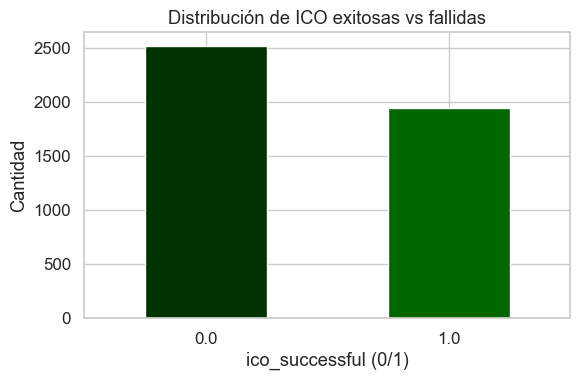

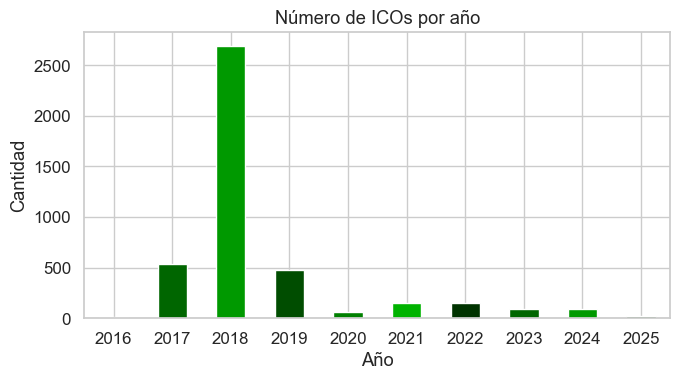

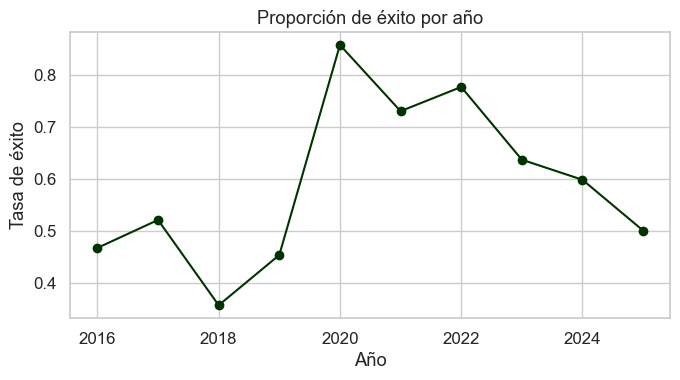

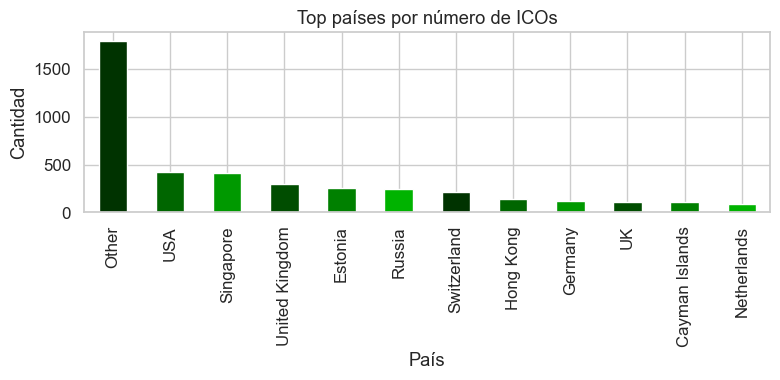

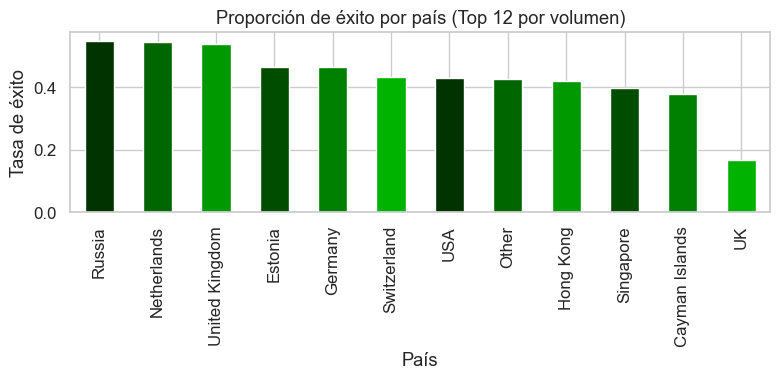

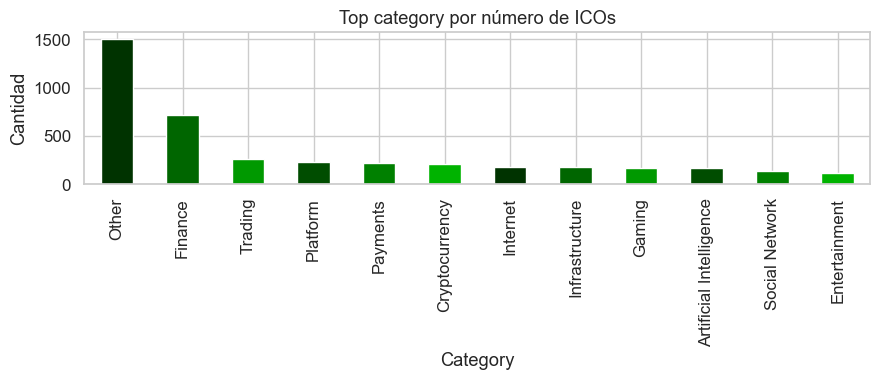

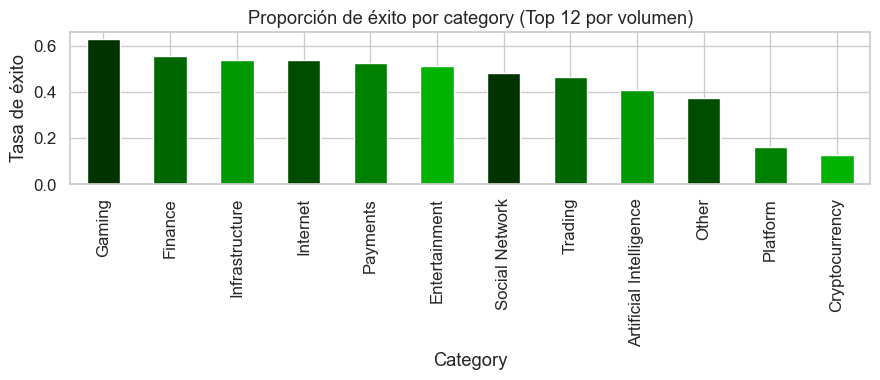

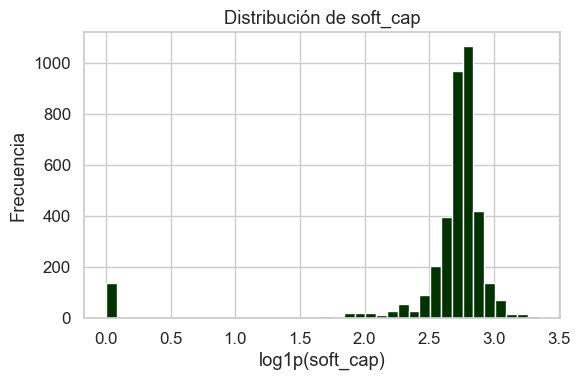

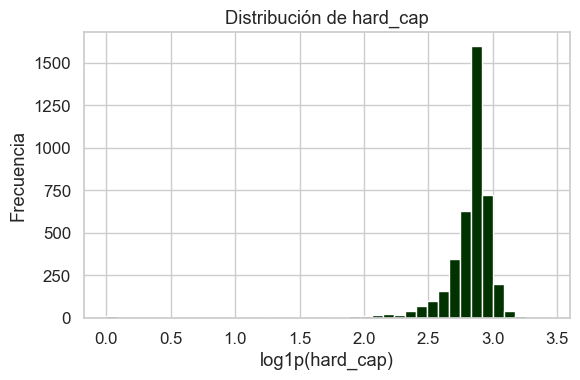

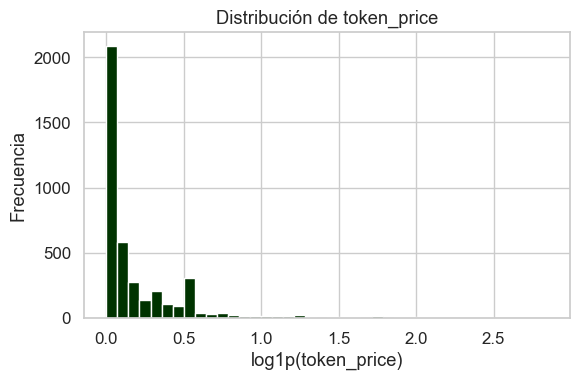

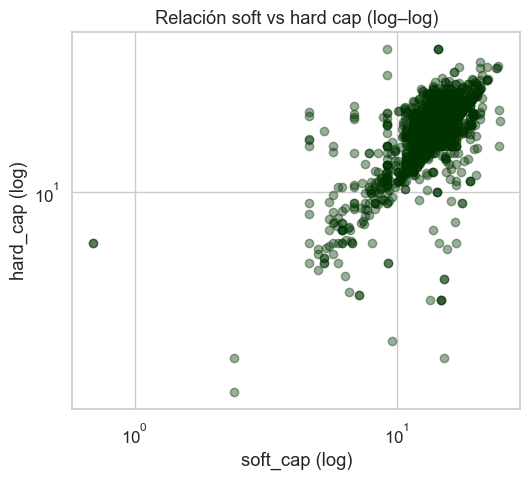

✅ EDA listo. Imágenes guardadas en: ../graficos_nuevos/figs_eda


In [4]:

# ---- Directorio para las imagenes generadas ----
OUT_DIR = "../graficos_nuevos/figs_eda"
os.makedirs(OUT_DIR, exist_ok=True)

colors = [(0, 0.2, 0, 1), (0, 0.4, 0, 1), (0, 0.6, 0, 1),(0, 0.3, 0, 1), (0, 0.5, 0, 1), (0, 0.7, 0, 1)]  # Different shades of green
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# --- Helpers ---
def savefig(path):
    plt.tight_layout()
    plt.savefig(path, dpi=200)
    plt.show()

# 1) Distribución de la clase (éxito vs fallo)
if "ico_successful" in df.columns:
    plt.figure(figsize=(6,4))
    df["ico_successful"].value_counts(dropna=False).sort_index().plot(kind="bar", color=colors)
    plt.title("Distribución de ICO exitosas vs fallidas")
    plt.xticks(rotation=0)
    plt.xlabel("ico_successful (0/1)")
    plt.ylabel("Cantidad")
    savefig(os.path.join(OUT_DIR, "fig_class_distribution.png"))
    plt.show()

# 2) ICOs por año (requiere start_year)
if "start_year" in df.columns:
    plt.figure(figsize=(7,4))
    df["start_year"].dropna().astype(int).value_counts().sort_index().plot(kind="bar", color=colors)
    plt.title("Número de ICOs por año")
    plt.xticks(rotation=0)
    plt.xlabel("Año")
    plt.ylabel("Cantidad")
    savefig(os.path.join(OUT_DIR, "fig_icobyyear_counts.png"))
    plt.show()

# 3) Proporción de éxito por año
if set(["start_year","ico_successful"]).issubset(df.columns):
    grp = df.dropna(subset=["start_year"]).groupby("start_year")["ico_successful"].mean()
    plt.figure(figsize=(7,4))
    grp.plot(kind="line", marker="o", color=colors)
    plt.title("Proporción de éxito por año")
    plt.xlabel("Año")
    plt.ylabel("Tasa de éxito")
    savefig(os.path.join(OUT_DIR, "fig_success_rate_by_year.png"))
    plt.show()

# 4) Top países por volumen
if "location" in df.columns:
    top_n = df["location"].dropna().value_counts().head(12)
    plt.figure(figsize=(8,4))
    top_n.plot(kind="bar", color=colors)
    plt.title("Top países por número de ICOs")
    plt.xlabel("País")
    plt.ylabel("Cantidad")
    savefig(os.path.join(OUT_DIR, "fig_top_countries_counts.png"))
    plt.show()

# 5) Proporción de éxito por país (top N países por volumen)
if set(["location","ico_successful"]).issubset(df.columns):
    top_countries = df["location"].dropna().value_counts().head(12).index
    tmp = df[df["location"].isin(top_countries)]
    rate = tmp.groupby("location")["ico_successful"].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    rate.plot(kind="bar", color=colors)
    plt.title("Proporción de éxito por país (Top 12 por volumen)")
    plt.xlabel("País")
    plt.ylabel("Tasa de éxito")
    savefig(os.path.join(OUT_DIR, "fig_success_rate_by_country.png"))
    plt.show()

# 6) Distribución por industria/categoría
cat_col = "category" if "category" in df.columns else ("industry" if "industry" in df.columns else None)
if cat_col:
    top_cat = df[cat_col].dropna().value_counts().head(12)
    plt.figure(figsize=(9,4))
    top_cat.plot(kind="bar", color=colors)
    plt.title(f"Top {cat_col} por número de ICOs")
    plt.xlabel(cat_col.capitalize())
    plt.ylabel("Cantidad")
    savefig(os.path.join(OUT_DIR, f"fig_top_{cat_col}_counts.png"))
    plt.show()

# 7) Proporción de éxito por industria/categoría (Top N)
if cat_col and "ico_successful" in df.columns:
    top_cat_names = df[cat_col].dropna().value_counts().head(12).index
    tmp = df[df[cat_col].isin(top_cat_names)]
    rate = tmp.groupby(cat_col)["ico_successful"].mean().sort_values(ascending=False)
    plt.figure(figsize=(9,4))
    rate.plot(kind="bar", color=colors)
    plt.title(f"Proporción de éxito por {cat_col} (Top 12 por volumen)")
    plt.xlabel(cat_col.capitalize())
    plt.ylabel("Tasa de éxito")
    savefig(os.path.join(OUT_DIR, f"fig_success_rate_by_{cat_col}.png"))
    plt.show()

# 8) Histogramas log1p de soft_cap y hard_cap
for col in ["soft_cap","hard_cap","token_price"]:
    if col in df.columns:
        vals = pd.to_numeric(df[col], errors="coerce")
        vals = vals[vals.notna() & (vals>=0)]
        if len(vals) > 0:
            plt.figure(figsize=(6,4))
            plt.hist(np.log1p(vals), bins=40)
            plt.title(f"Distribución de {col}")
            plt.xlabel(f"log1p({col})")
            plt.ylabel("Frecuencia")
            savefig(os.path.join(OUT_DIR, f"fig_hist_log1p_{col}.png"))
            plt.show()

# 9) Dispersión Soft vs Hard cap (log-log)
if set(["soft_cap","hard_cap"]).issubset(df.columns):
    s = pd.to_numeric(df["soft_cap"], errors="coerce")
    h = pd.to_numeric(df["hard_cap"], errors="coerce")
    m = s.notna() & h.notna() & (s>0) & (h>0)
    if m.sum() > 0:
        plt.figure(figsize=(5.5,5))
        plt.scatter(s[m], h[m], alpha=0.4)
        plt.xscale("log"); plt.yscale("log")
        plt.xlabel("soft_cap (log)")
        plt.ylabel("hard_cap (log)")
        plt.title("Relación soft vs hard cap (log–log)")
        savefig(os.path.join(OUT_DIR, "fig_scatter_soft_vs_hard_loglog.png"))
        plt.show()

print(f"✅ EDA listo. Imágenes guardadas en: {OUT_DIR}")


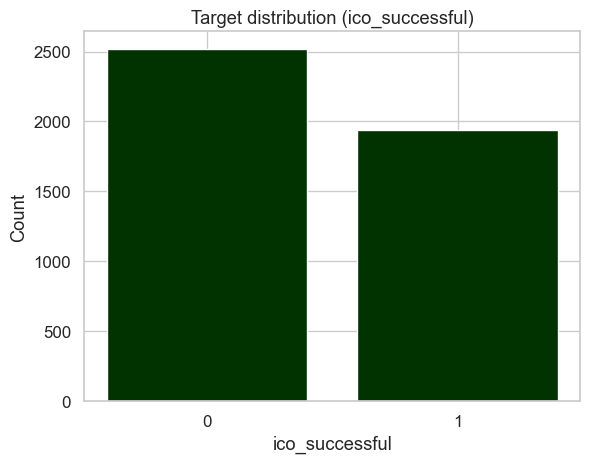

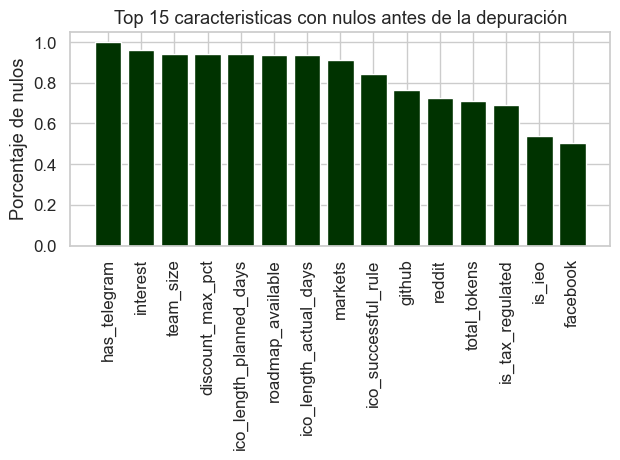

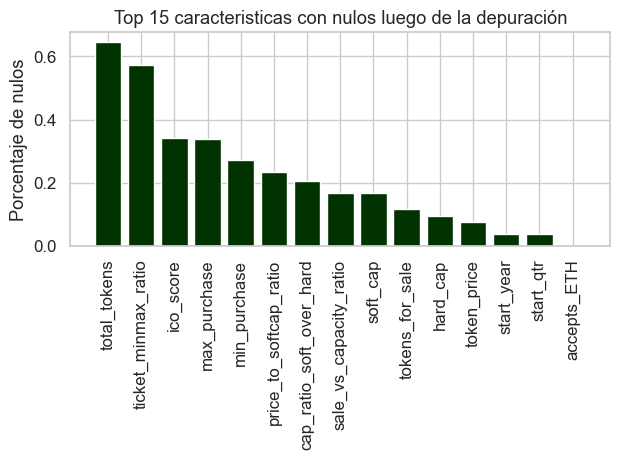

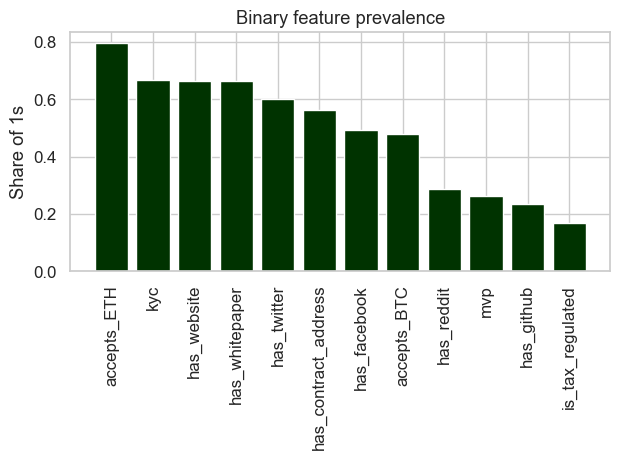

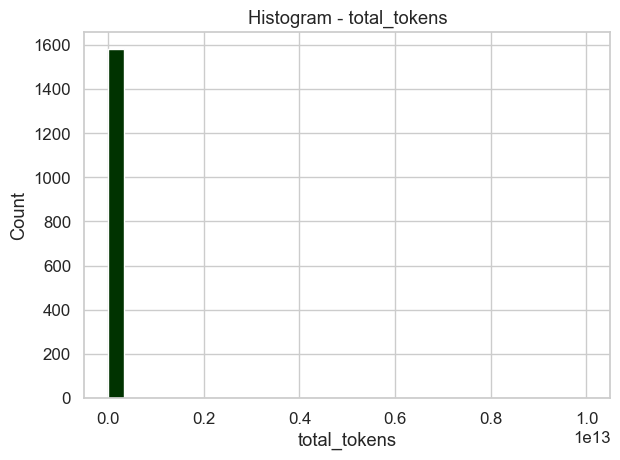

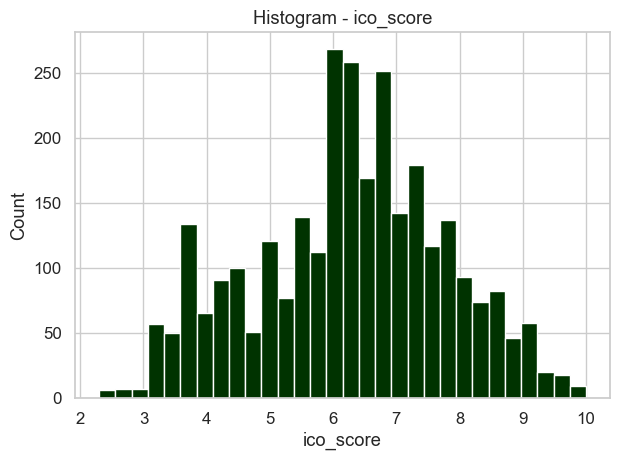

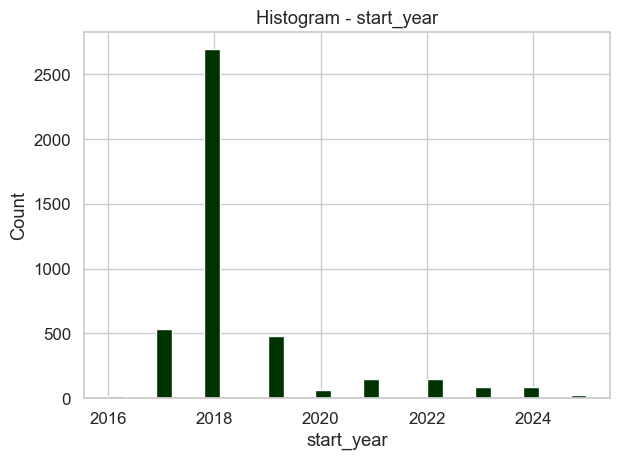

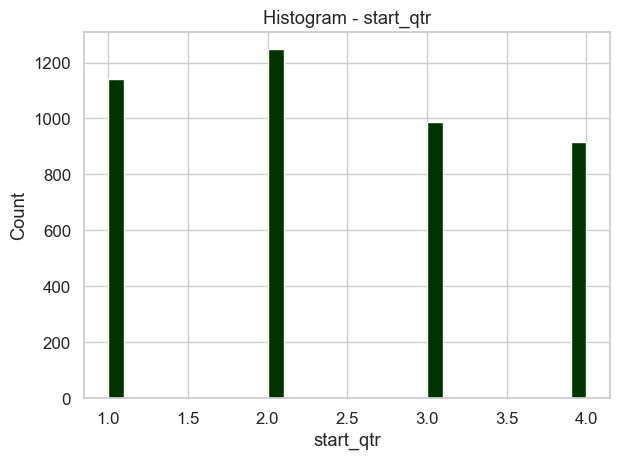

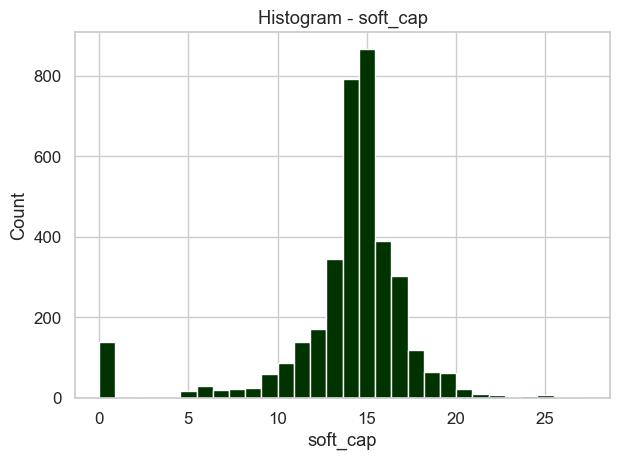

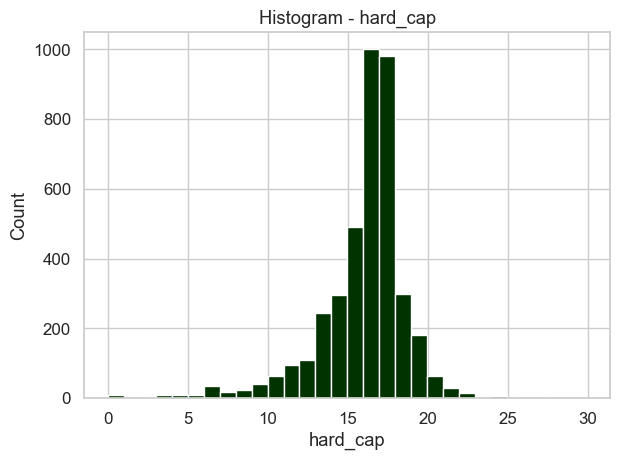

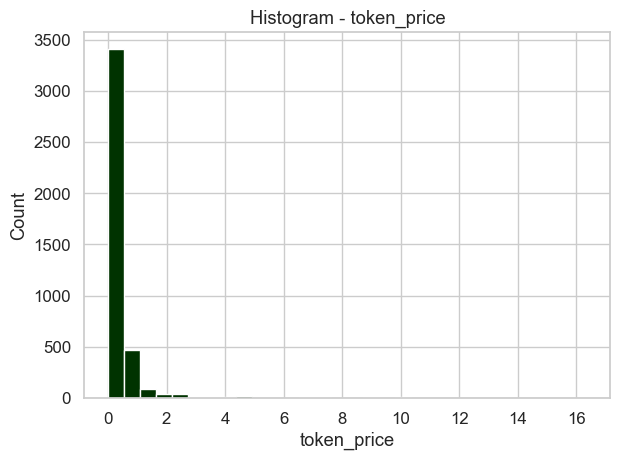

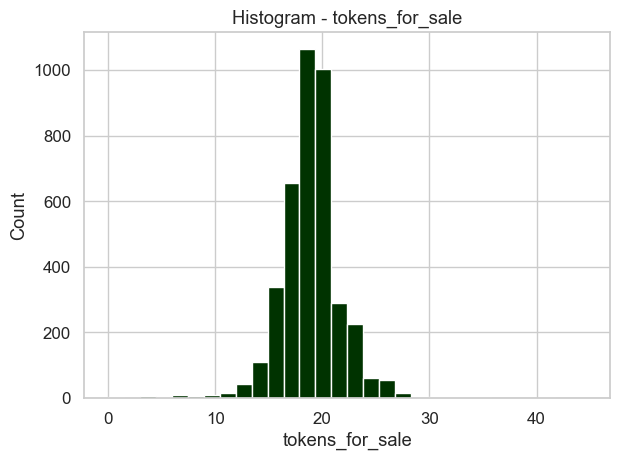

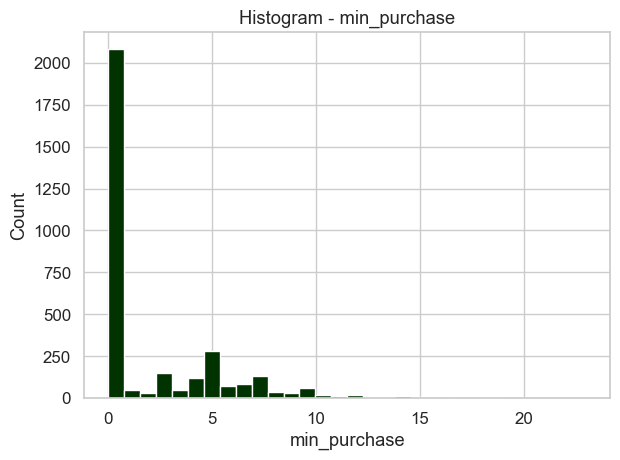

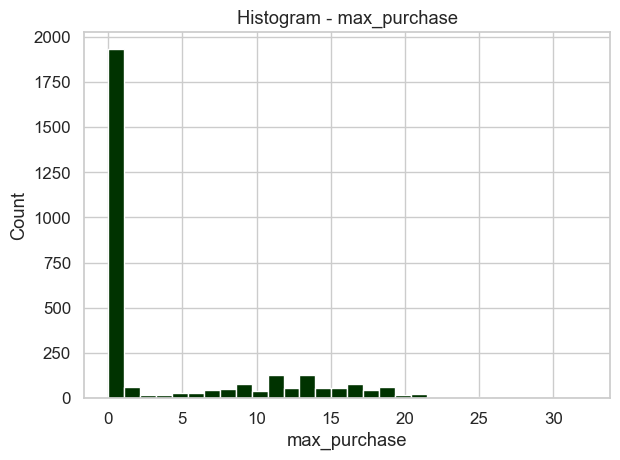

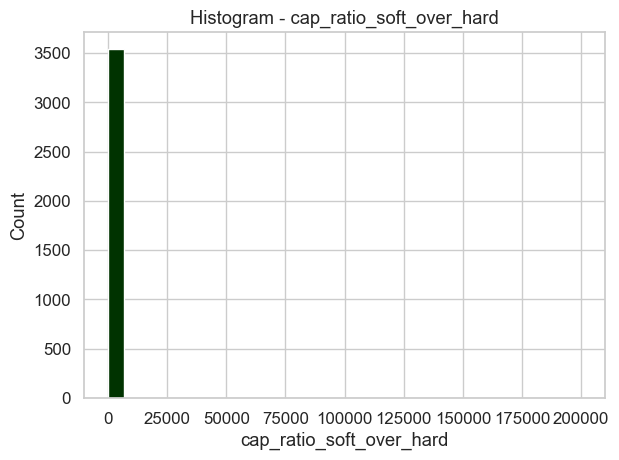

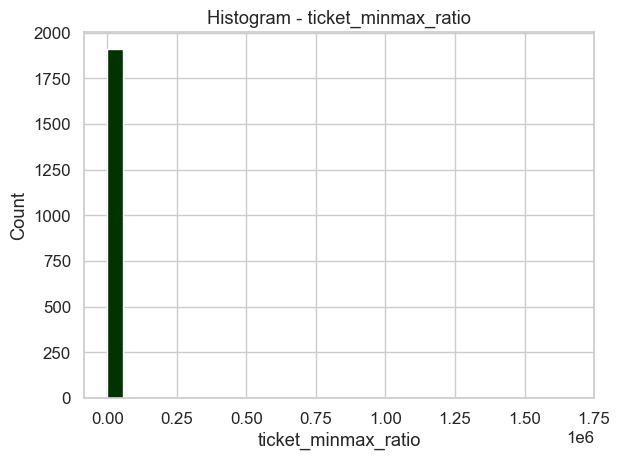

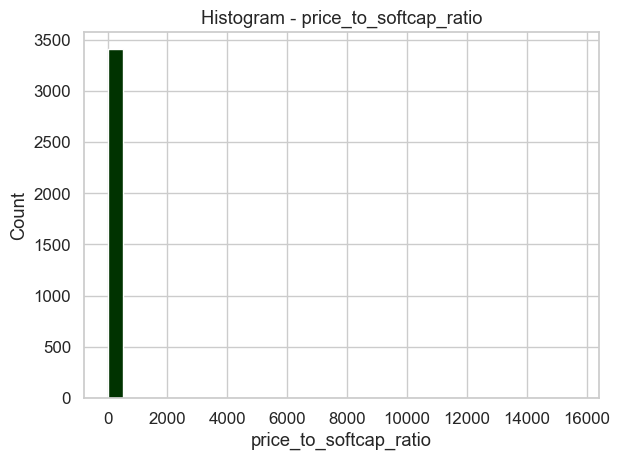

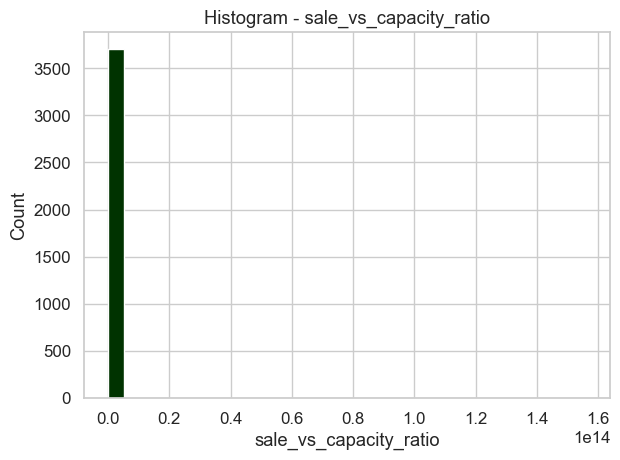

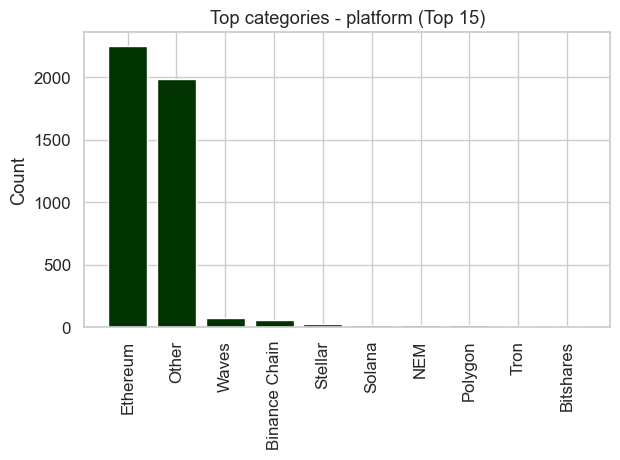

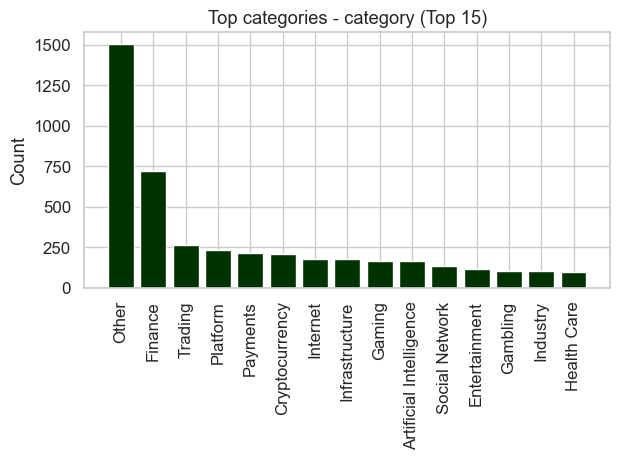

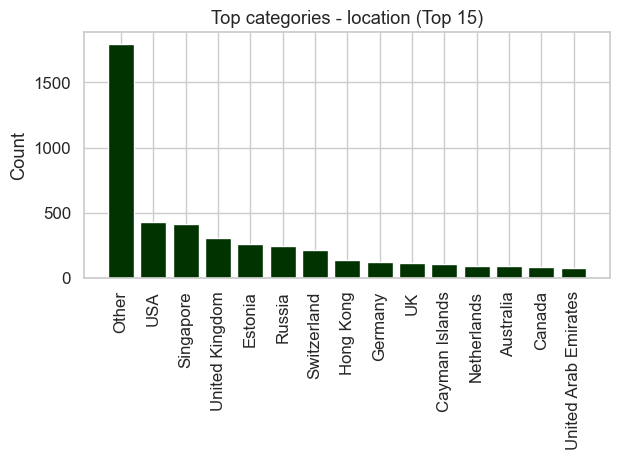

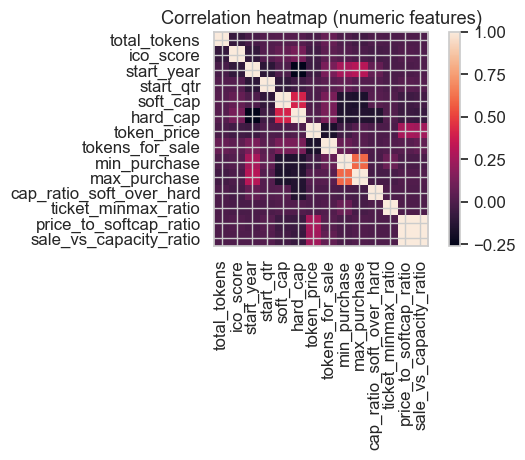

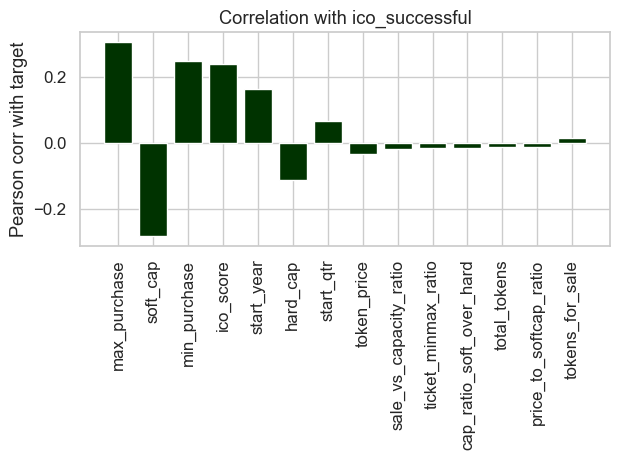

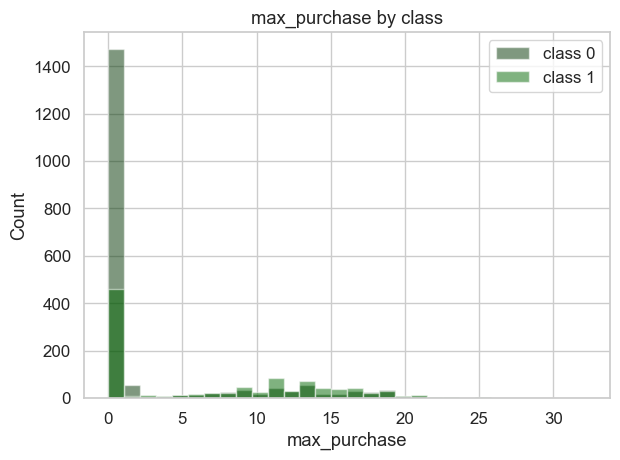

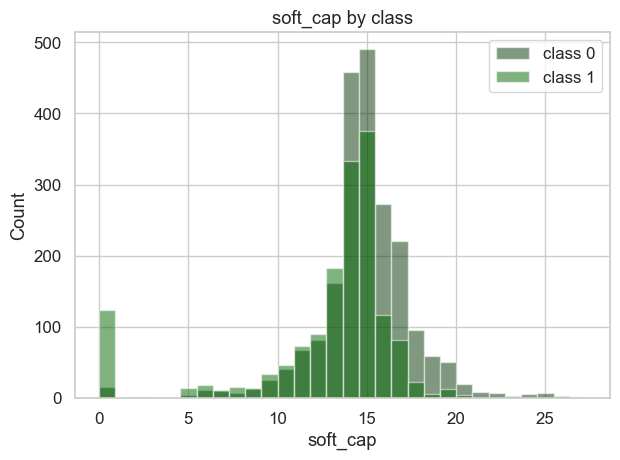

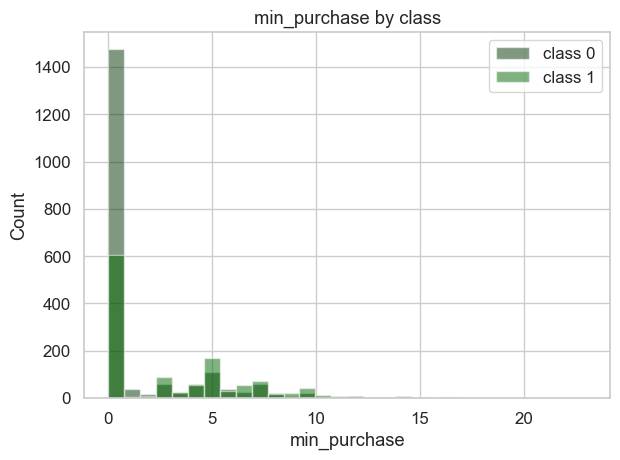

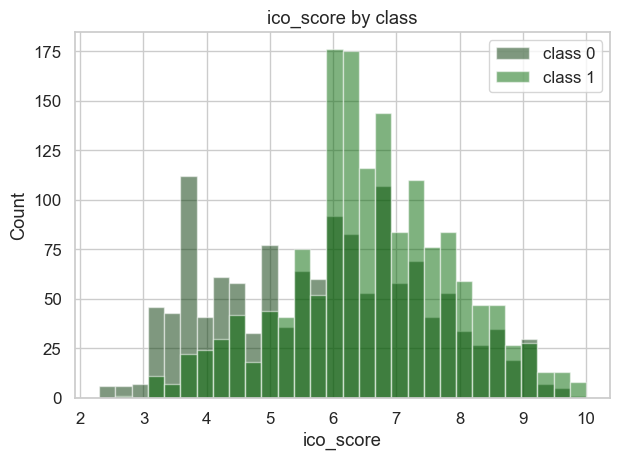

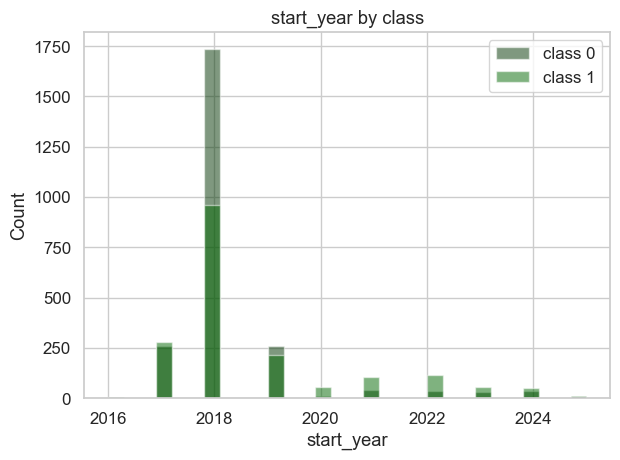

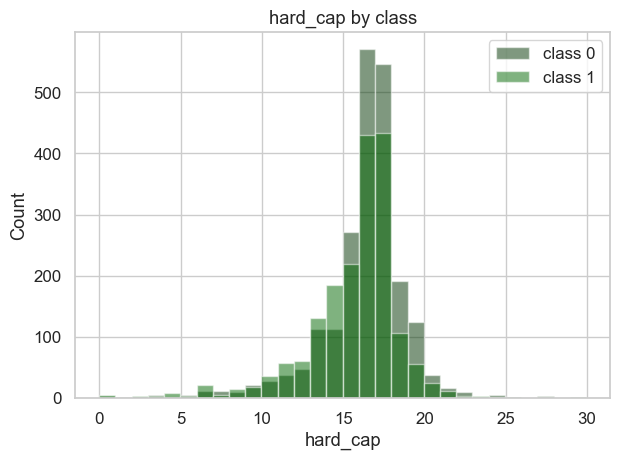

<timed exec>:187: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


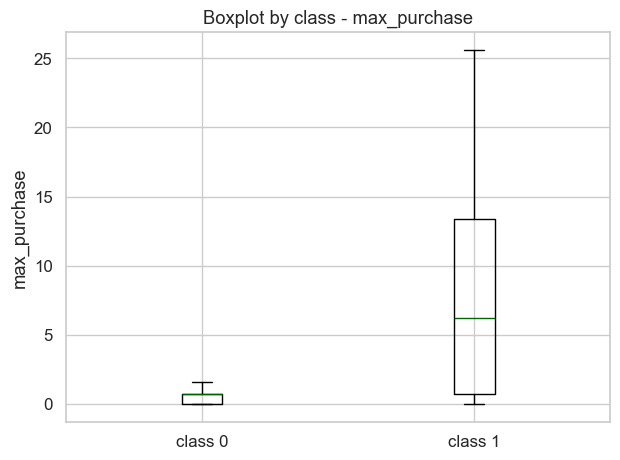

<timed exec>:187: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


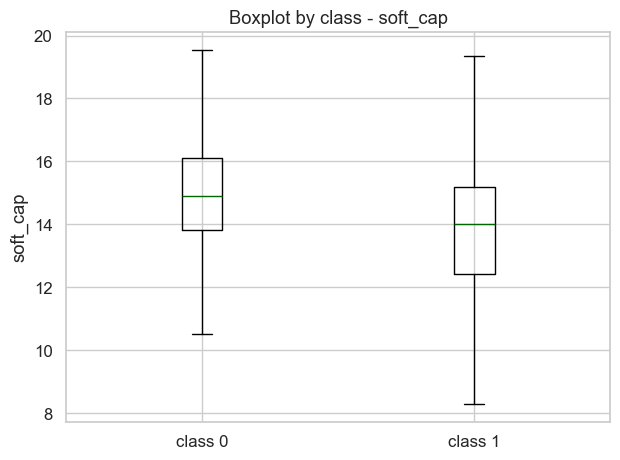

<timed exec>:187: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


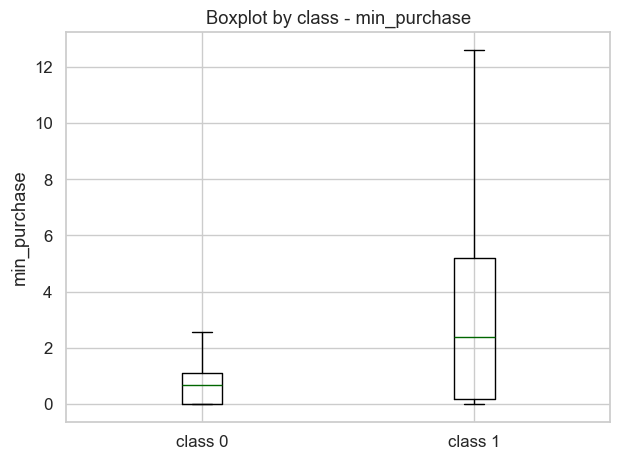

<timed exec>:187: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


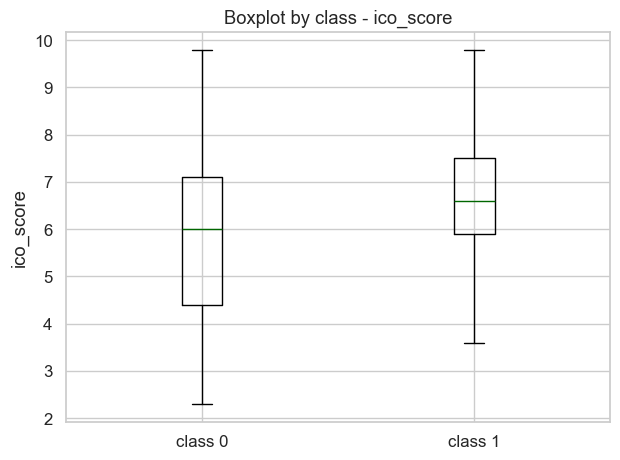

<timed exec>:187: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


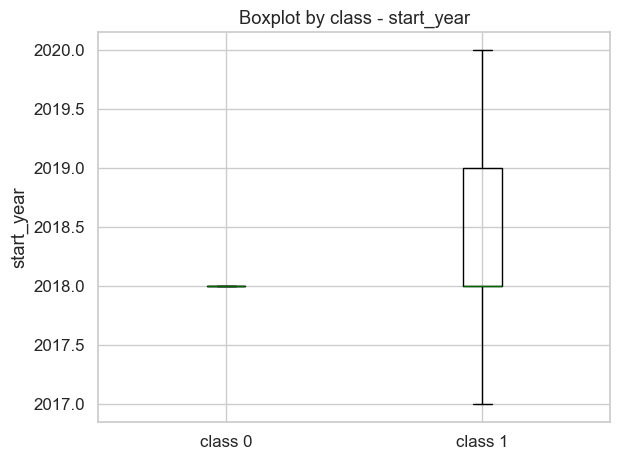

<timed exec>:187: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


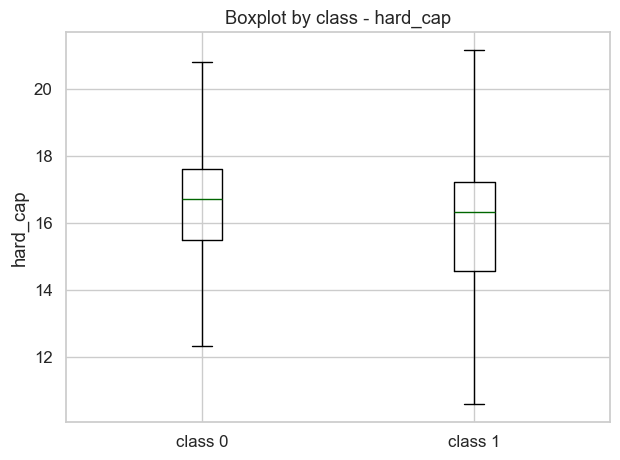

[EDA] Carpeta con figuras/tablas: ../graficos_dataset/eda_ico_v1
CPU times: total: 7.09 s
Wall time: 7.37 s


In [29]:
%%time

# =========================================== #
# ================ EDA ICOs ================= #
# =========================================== #

# --- Config
OUT_DIR = f"../graficos_dataset/eda_ico_v1"
os.makedirs(OUT_DIR, exist_ok=True)

# --- Target (si existe)
TARGET = "ico_successful" if "ico_successful" in df.columns else None
if TARGET:
    # intentar cast a int (0/1)
    try:
        df[TARGET] = df[TARGET].astype(float)
        if set(df[TARGET].dropna().unique()).issubset({0.0, 1.0}):
            df[TARGET] = df[TARGET].astype(int)
    except Exception:
        pass

# --- Helpers
def is_binary_series(s: pd.Series) -> bool:
    if s.dtype == "O":
        return False
    vals = s.dropna().unique()
    if len(vals) == 0:
        return False
    return set(np.unique(vals)).issubset({0,1,0.0,1.0,True,False})

# --- Tipado de columnas
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
obj_cols = df.select_dtypes(include=["object"]).columns.tolist()

binary_cols = [c for c in num_cols_all if c != TARGET and is_binary_series(df[c])]
numeric_cols = [c for c in num_cols_all if c not in binary_cols and c != TARGET]
categorical_cols = obj_cols

# --- Resumenes a CSV
summary = pd.Series({
    "n_rows": df.shape[0],
    "n_cols": df.shape[1],
    "n_numeric": len(numeric_cols),
    "n_binary": len(binary_cols),
    "n_categorical": len(categorical_cols),
    "target_present": bool(TARGET),
    "target_pos_rate": float(df[TARGET].mean()) if TARGET else None
})
summary.to_csv(os.path.join(OUT_DIR, "dataset_summary.csv"))

desc = df[numeric_cols].describe(include="all").T if numeric_cols else pd.DataFrame()
desc.to_csv(os.path.join(OUT_DIR, "numeric_describe.csv"))

# --- 0) Distribución del target
if TARGET:
    vc = df[TARGET].value_counts().sort_index()
    plt.figure()
    plt.bar([str(int(k)) for k in vc.index], vc.values)
    plt.xlabel(TARGET); plt.ylabel("Count")
    plt.title(f"Target distribution ({TARGET})")
    plt.show()
    plt.tight_layout(); plt.savefig(os.path.join(OUT_DIR, "target_distribution.png"), bbox_inches="tight"); plt.close()

# --- 1) Nulos por columna

DATA_PATH = "../final/ico_dataset_final_v2.csv"
df_viejo = pd.read_csv(DATA_PATH)
miss_frac = df_viejo.isna().mean().sort_values(ascending=False).head(15)
plt.figure()
plt.bar(miss_frac.index, miss_frac.values)
plt.xticks(rotation=90)
plt.ylabel("Porcentaje de nulos")
plt.title("Top 15 caracteristicas con nulos antes de la depuración")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR, "missingness_bar.png"), bbox_inches="tight")
plt.close()

miss_frac = df.isna().mean().sort_values(ascending=False).head(15)
plt.figure()
plt.bar(miss_frac.index, miss_frac.values)
plt.xticks(rotation=90)
plt.ylabel("Porcentaje de nulos")
plt.title("Top 15 caracteristicas con nulos luego de la depuración")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR, "missingness_bar.png"), bbox_inches="tight")
plt.close()

# --- 2) Prevalencia de columnas binarias
if binary_cols:
    preval = df[binary_cols].mean(numeric_only=True).sort_values(ascending=False)
    plt.figure()
    plt.bar(preval.index, preval.values)
    plt.xticks(rotation=90)
    plt.ylabel("Share of 1s")
    plt.title("Binary feature prevalence")
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(OUT_DIR, "binary_prevalence.png"), bbox_inches="tight")
    plt.close()

# --- 3) Histogramas para numéricas (uno por archivo)
for c in numeric_cols:
    data = df[c].dropna()
    if data.empty:
        continue
    plt.figure()
    plt.hist(data, bins=30)
    plt.xlabel(c); plt.ylabel("Count")
    plt.title(f"Histogram - {c}")
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(OUT_DIR, f"hist_{c}.png"), bbox_inches="tight")
    plt.close()

# --- 4) Barras Top-15 para categóricas
for c in categorical_cols:
    vc = df[c].astype(str).replace({"nan":"<NA>"}).value_counts().head(15)
    plt.figure()
    plt.bar(vc.index, vc.values)
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.title(f"Top categories - {c} (Top 15)")
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(OUT_DIR, f"bar_top15_{c}.png"), bbox_inches="tight")
    plt.close()

# --- 5) Heatmap de correlación (numéricas)
if numeric_cols:
    corr = df[numeric_cols].corr(method="pearson")
    plt.figure()
    plt.imshow(corr.values, interpolation="nearest")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar()
    plt.title("Correlation heatmap (numeric features)")
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(OUT_DIR, "correlation_heatmap_numeric.png"), bbox_inches="tight")
    plt.close()

# --- 6) Correlación con el target (barra)
if TARGET and numeric_cols:
    tgt_corr = df[numeric_cols + [TARGET]].corr()[TARGET].drop(TARGET).sort_values(key=lambda s: s.abs(), ascending=False)
    plt.figure()
    plt.bar(tgt_corr.index, tgt_corr.values)
    plt.xticks(rotation=90)
    plt.ylabel("Pearson corr with target")
    plt.title(f"Correlation with {TARGET}")
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(OUT_DIR, "target_correlation_bar.png"), bbox_inches="tight")
    plt.close()

# --- 7) Overlays por clase (hasta 6 numéricas más correlacionadas con el target)
overlay_cols = []
if numeric_cols and TARGET:
    abs_corr = df[numeric_cols + [TARGET]].corr()[TARGET].drop(TARGET).abs().sort_values(ascending=False)
    overlay_cols = abs_corr.head(min(6, len(abs_corr))).index.tolist()

for c in overlay_cols:
    a = df[df[TARGET]==0][c].dropna()
    b = df[df[TARGET]==1][c].dropna()
    if a.empty or b.empty:
        continue
    bins = np.histogram_bin_edges(pd.concat([a,b]), bins=30)
    plt.figure()
    plt.hist(a, bins=bins, alpha=0.5, label="class 0")
    plt.hist(b, bins=bins, alpha=0.5, label="class 1")
    plt.legend()
    plt.xlabel(c); plt.ylabel("Count"); plt.title(f"{c} by class")
    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(OUT_DIR, f"class_overlay_{c}.png"), bbox_inches="tight")
    plt.close()

# --- 8) Boxplots por clase (para top-6 numéricas por |corr|)
box_cols = overlay_cols[:6]
for c in box_cols:
    if c not in df.columns: 
        continue
    sub = df[[c, TARGET]].dropna() if TARGET else df[[c]].dropna()
    if TARGET and not sub.empty:
        plt.figure()
        data0 = sub[sub[TARGET]==0][c].values
        data1 = sub[sub[TARGET]==1][c].values
        plt.boxplot([data0, data1], labels=["class 0", "class 1"], showfliers=False)
        plt.ylabel(c); plt.title(f"Boxplot by class - {c}")
        plt.tight_layout()
        plt.show()
        plt.savefig(os.path.join(OUT_DIR, f"boxplot_byclass_{c}.png"), bbox_inches="tight")
        plt.close()

# --- 9) Índice de archivos y muestra inline de lo principal
generated = sorted([f for f in os.listdir(OUT_DIR) if f.lower().endswith((".png", ".csv"))])
pd.Series(generated).to_csv(os.path.join(OUT_DIR, "files_index.csv"), index=False)

print(f"[EDA] Carpeta con figuras/tablas: {OUT_DIR}")
# print("Ejemplos generados:")
# for name in ["missingness_bar.png", "binary_prevalence.png", "correlation_heatmap_numeric.png", "target_correlation_bar.png"]:
#     p = os.path.join(OUT_DIR, name)
#     if os.path.exists(p):
#         display_name = name
#         try:
#             from IPython.display import display, Image
#             display(Image(filename=p))
#         except Exception:
#             print(" -", p)


C:\Users\dmigl\AppData\Local\Temp\ipykernel_11184\474594860.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_anteultimo, x="ico_successful_rule", order=df_anteultimo["ico_successful_rule"].value_counts().index, palette="Greens_r")


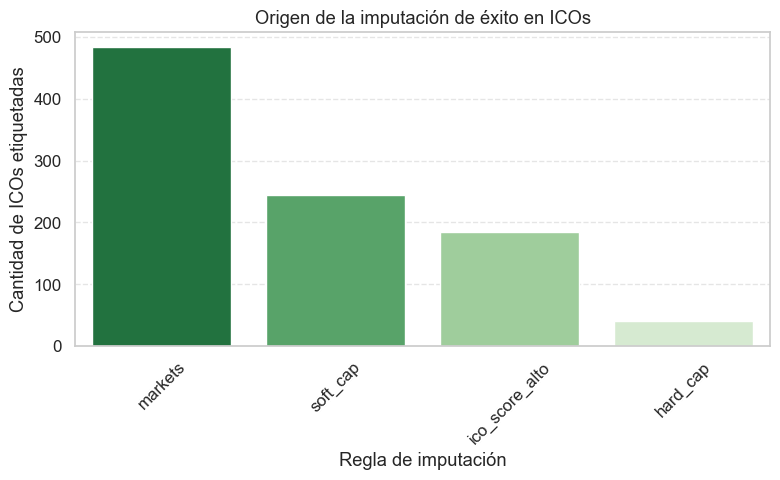

C:\Users\dmigl\AppData\Local\Temp\ipykernel_11184\474594860.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_imputados, x="ico_successful_rule", order=df_imputados["ico_successful_rule"].value_counts().index, palette="Greens_r")


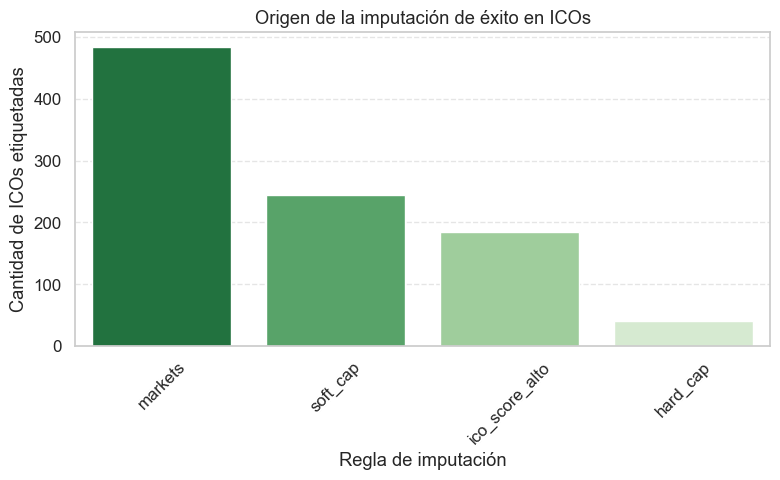

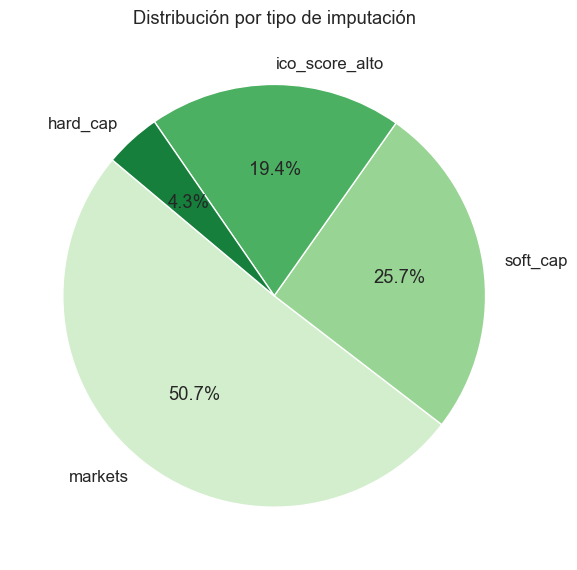

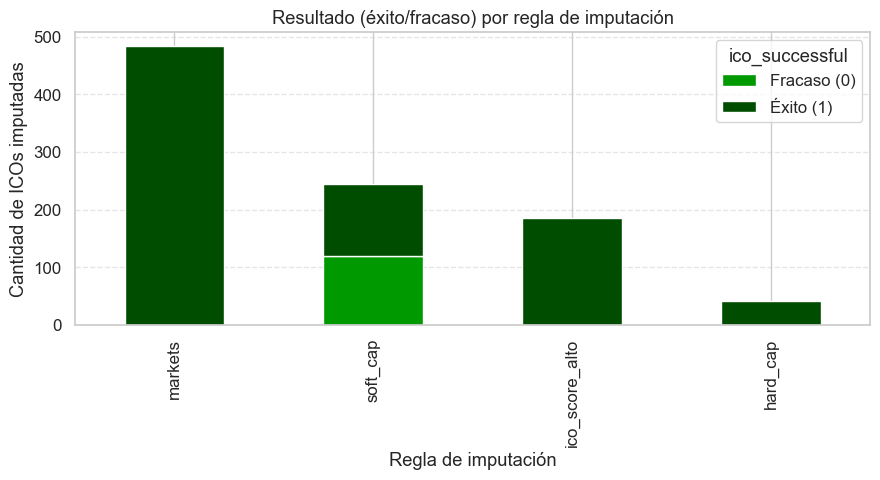

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "../final/ico_dataset_final_v2_clean_enriquecido_feature_engineering_v1.csv"
df_anteultimo = pd.read_csv(DATA_PATH)

# Asegurate de ejecutar esto luego de llamar a imputar_valores_ico_successful()
plt.figure(figsize=(8,5))
#df_anteultimo["ico_successful_rule"] = df_anteultimo["ico_successful_rule"].fillna("No imputado")
ax = sns.countplot(data=df_anteultimo, x="ico_successful_rule", order=df_anteultimo["ico_successful_rule"].value_counts().index, palette="Greens_r")
plt.title("Origen de la imputación de éxito en ICOs")
plt.xlabel("Regla de imputación")
plt.ylabel("Cantidad de ICOs etiquetadas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
df_imputados = df_anteultimo[df_anteultimo["ico_successful_rule"].notna()]  # Filtra solo los que fueron imputados
ax = sns.countplot(data=df_imputados, x="ico_successful_rule", order=df_imputados["ico_successful_rule"].value_counts().index, palette="Greens_r")
plt.title("Origen de la imputación de éxito en ICOs")
plt.xlabel("Regla de imputación")
plt.ylabel("Cantidad de ICOs etiquetadas")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Pie chart solo de imputados, por tipo de regla
imputados = df_anteultimo[df_anteultimo["ico_successful_rule"].notna()]
pie_counts = imputados["ico_successful_rule"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(pie_counts.values, labels=pie_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Greens", len(pie_counts)))
plt.title("Distribución por tipo de imputación")
plt.tight_layout()
plt.show()

df_imputados = df_anteultimo[df_anteultimo["ico_successful_rule"].notna()]  # Filtra solo los imputados
rule_vs_success = pd.crosstab(df_imputados["ico_successful_rule"], df_imputados["ico_successful"])

# Reordenar por cantidad total descendente
rule_vs_success = rule_vs_success.loc[rule_vs_success.sum(axis=1).sort_values(ascending=False).index]

# Gráfico apilado
# (0, 0.2, 0, 1), (0, 0.4, 0, 1) (0, 0.6, 0, 1),(0, 0.3, 0, 1)
rule_vs_success.plot(kind="bar", stacked=True, figsize=(9,5), color = [(0, 0.6, 0, 1),(0, 0.3, 0, 1)])
plt.title("Resultado (éxito/fracaso) por regla de imputación")
plt.xlabel("Regla de imputación")
plt.ylabel("Cantidad de ICOs imputadas")
plt.legend(title="ico_successful", labels=["Fracaso (0)", "Éxito (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


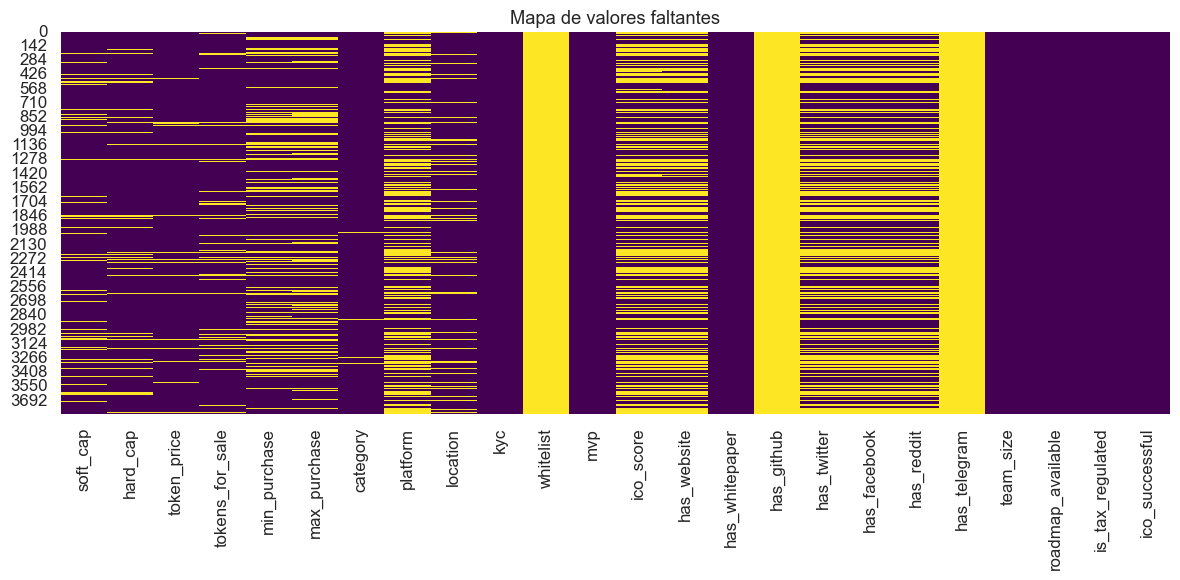

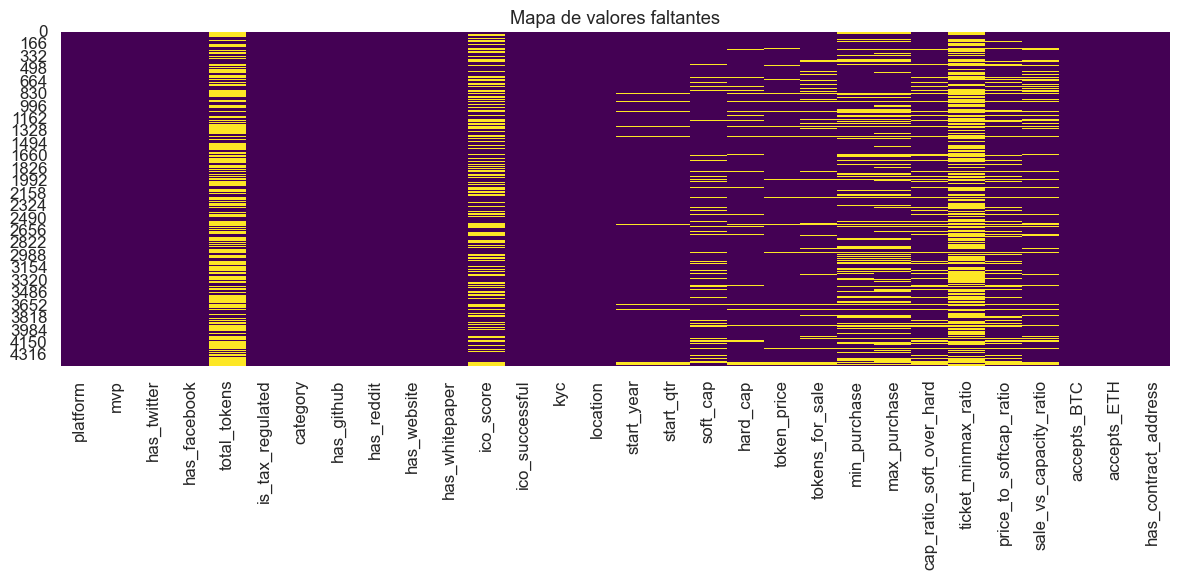

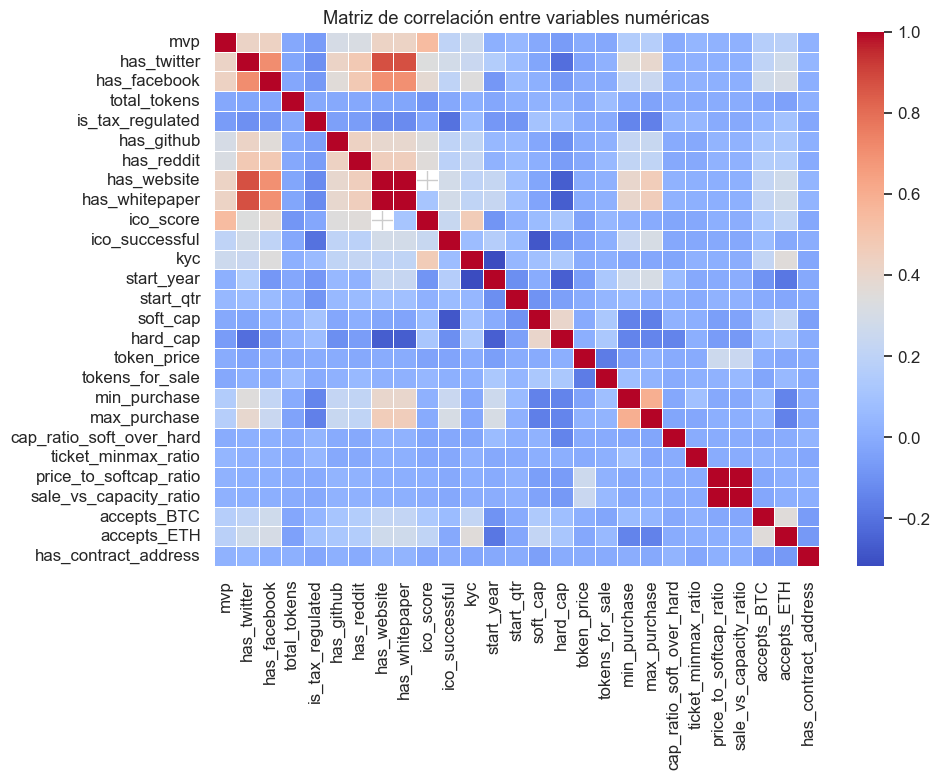

C:\Users\dmigl\AppData\Local\Temp\ipykernel_11184\659260837.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types.index, y=types.values, palette="Set2")


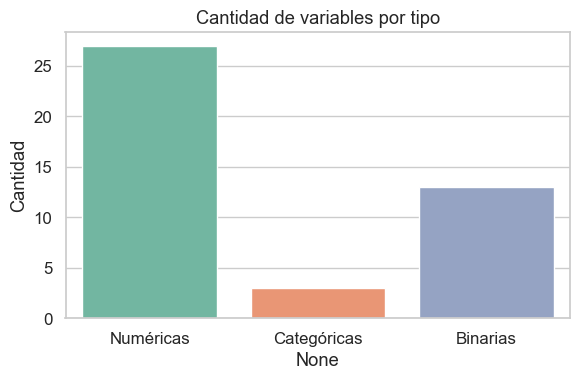

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


DATA_PATH = "../final/ico_dataset_preico_feature_engineering.csv"
DATA_PATH = "../final/ico_dataset_preico_features_v2.csv"
df_viejo = pd.read_csv(DATA_PATH)

# 1. Heatmap de valores faltantes
def plot_missing_values_heatmap(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Mapa de valores faltantes")
    plt.tight_layout()
    plt.show()
plot_missing_values_heatmap(df_viejo)
plot_missing_values_heatmap(df)
# 2. Histograma de una variable numérica
def plot_histogram_variable(df, column):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribución de la variable: {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# 3. Boxplot de una variable numérica
def plot_boxplot_variable(df, column):
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=df[column], color="lightgreen")
    plt.title(f"Boxplot de la variable: {column}")
    plt.tight_layout()
    plt.show()

# 4. Heatmap de correlación entre numéricas
def plot_correlation_heatmap(df):
    numeric_df = df.select_dtypes(include=["number"])
    corr = numeric_df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Matriz de correlación entre variables numéricas")
    plt.tight_layout()
    plt.show()
plot_correlation_heatmap(df)
# 5. Conteo por tipo de variable
def plot_variable_type_counts(df):
    types = pd.Series({
        'Numéricas': df.select_dtypes(include=["number"]).shape[1],
        'Categóricas': df.select_dtypes(include=["object", "category"]).shape[1],
        'Binarias': len([col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]])
    })
    plt.figure(figsize=(6, 4))
    sns.barplot(x=types.index, y=types.values, palette="Set2")
    plt.title("Cantidad de variables por tipo")
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()
plot_variable_type_counts(df)

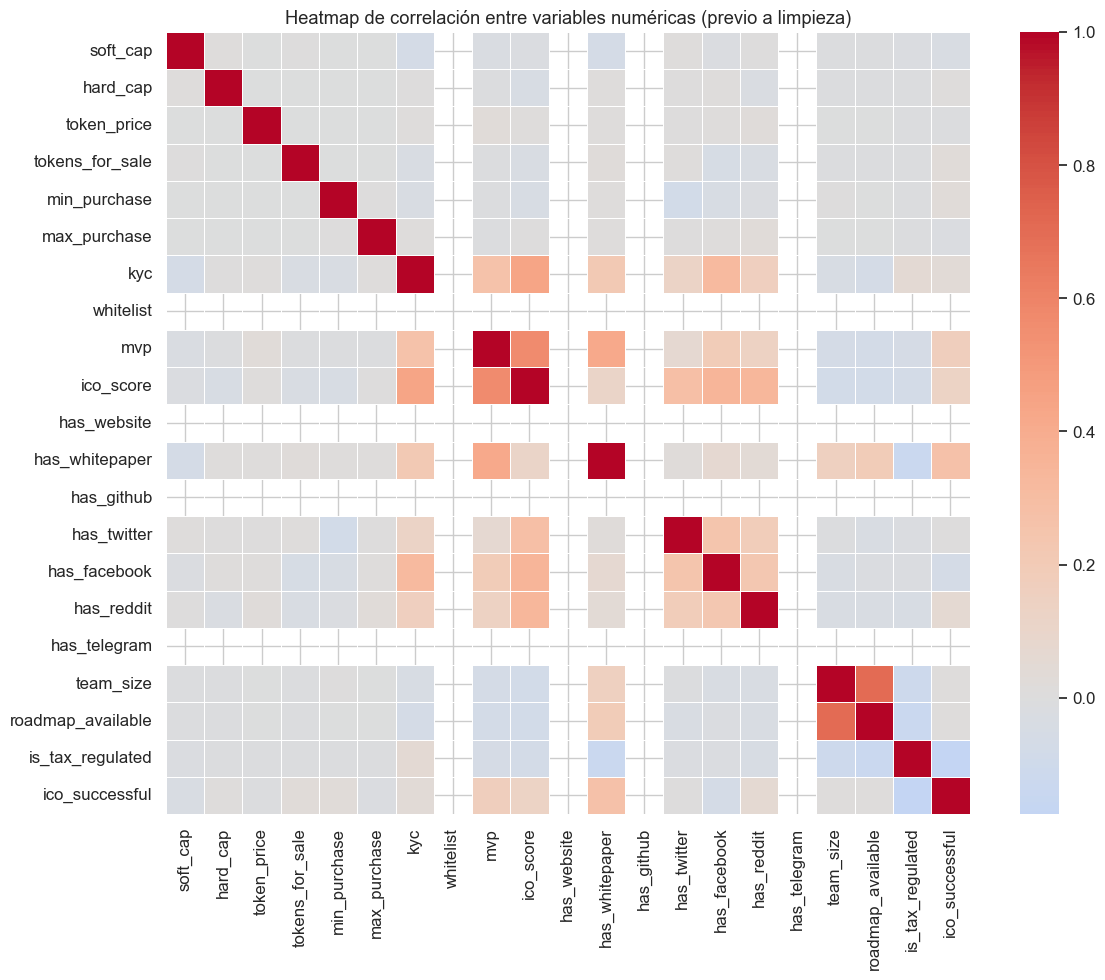

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset con solo columnas numéricas originales
numericas_originales = df_viejo.select_dtypes(include=["float64", "int64"])

# Opcional: si tenés muchas columnas, podés tomar una muestra
# numericas_originales = numericas_originales.sample(frac=0.3, axis=1)

# Matriz de correlación
corr = numericas_originales.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", annot=False, center=0, linewidths=0.5)
plt.title("Heatmap de correlación entre variables numéricas (previo a limpieza)")
plt.tight_layout()
plt.show()


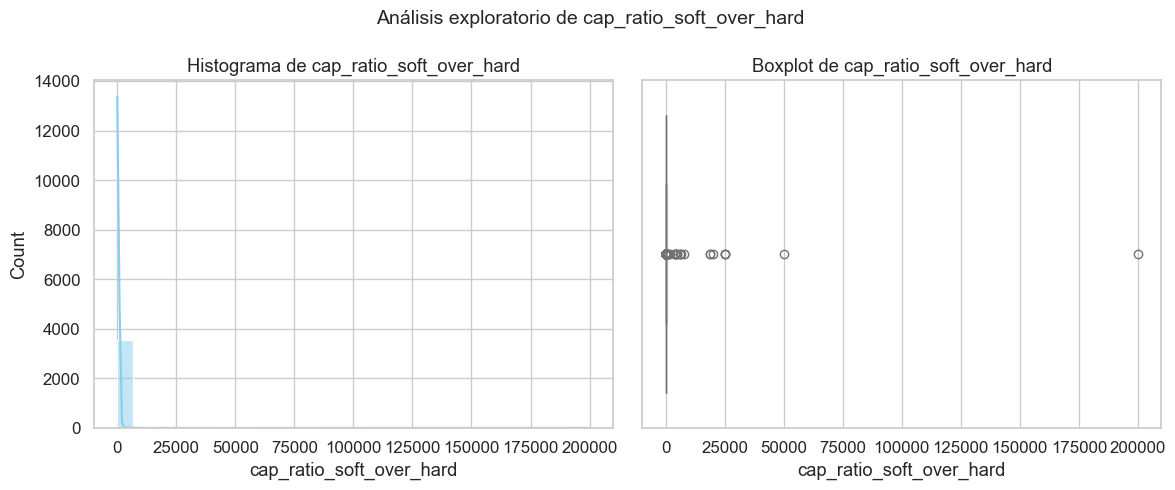

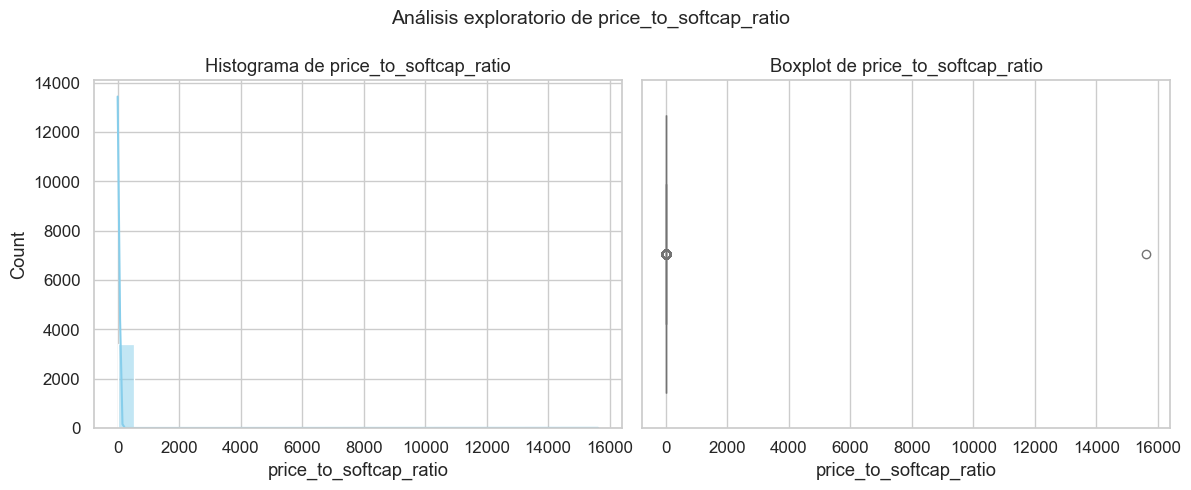

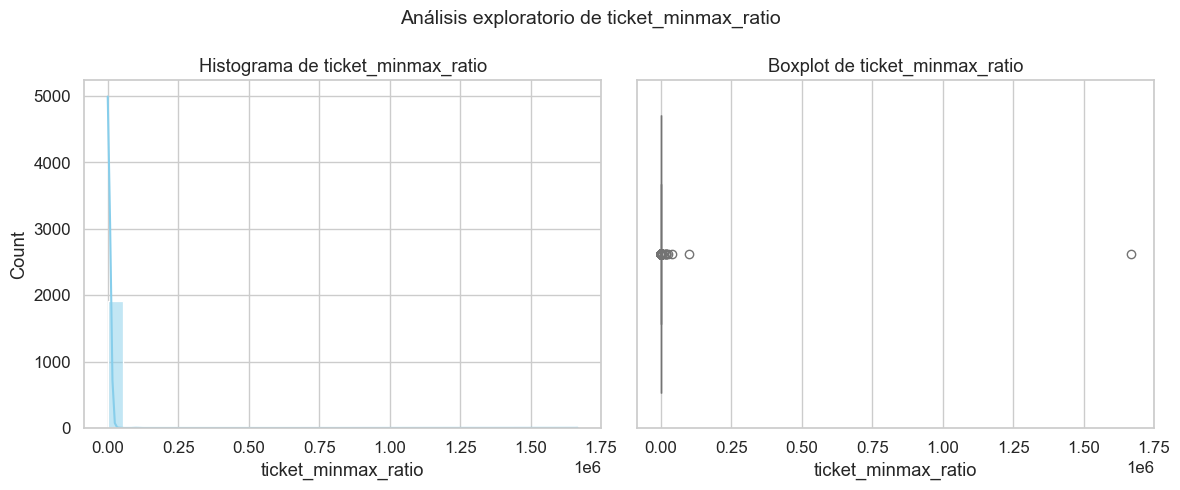

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurate de tener tu DataFrame llamado df
ratios = ["cap_ratio_soft_over_hard", "price_to_softcap_ratio", "ticket_minmax_ratio"]

for col in ratios:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histograma con KDE
    sns.histplot(df[col].dropna(), kde=True, bins=30, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histograma de {col}")
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df[col].dropna(), ax=axes[1], color="lightgreen")
    axes[1].set_title(f"Boxplot de {col}")
    axes[1].set_xlabel(col)

    plt.suptitle(f"Análisis exploratorio de {col}", fontsize=14)
    plt.tight_layout()
    plt.show()


In [6]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
from graphviz import Digraph
import os

OUT_DIR = "../graficos/figs_eda"
os.makedirs(OUT_DIR, exist_ok=True)

# --- Diagrama de flujo del pipeline de datasets ---
g = Digraph('dataset_pipeline', format='png')
g.attr(rankdir='LR', bgcolor='white')

# --- Nodos de fuentes ---
g.attr('node', shape='box', style='filled', color='#d0e2f2', fontname='Arial', fontsize='11')
g.node('zenodo', 'Zenodo\n(Fahlen-Brach, 2017–2020)')
g.node('icpsr', 'ICPSR\n(Villanueva, 2017–2019)')
g.node('kaggle', 'Kaggle\n(Maksi Yan, 2017–2023)')
g.node('foundico', 'FoundICO\n(API privada, 2018–2025)')

# --- Nodo integración académica ---
g.attr('node', shape='box', style='filled', color='#fff2cc')
g.node('union_acad', 'Integración inicial\n(3 fuentes académicas)')
g.node('found_merge', 'Fusión con FoundICO')

# --- Nodo de limpieza ---
g.attr('node', shape='box', style='filled', color='#fde9d9')
g.node('clean', 'Estandarización y resolución de conflictos\n(Nombres, duplicados, formatos, NaN)')

# --- Nodo enriquecimiento ---
g.attr('node', shape='box', style='filled', color='#e2efda')
g.node('enrich', 'Enriquecimiento con APIs\nCoinGecko / CoinPaprika / CMC')

# --- Nodo pre-ICO ---
g.attr('node', shape='box', style='filled', color='#d9e1f2')
g.node('preico', 'Filtrado pre-ICO\n(Remoción post-ICO / leakage temporal)')

# --- Nodo feature engineering ---
g.attr('node', shape='box', style='filled', color='#c6e0b4')
g.node('feat', 'Feature Engineering\n(Ratios financieros, binarización, log-scaling)')

# --- Nodo final ---
g.attr('node', shape='box', style='filled', color='#b4c6e7')
g.node('final', 'Dataset final pre-ICO\n(3827 ICOs, 42 features)')

# --- Conexiones ---
g.edges([
    ('zenodo', 'union_acad'),
    ('icpsr', 'union_acad'),
    ('kaggle', 'union_acad'),
    ('union_acad', 'found_merge'),
    ('foundico', 'found_merge'),
    ('found_merge', 'clean'),
    ('clean', 'enrich'),
    ('enrich', 'preico'),
    ('preico', 'feat'),
    ('feat', 'final')
])

# --- Estilo general ---
g.attr('edge', fontname='Arial', fontsize='9', color='#444444')
g.attr('graph', splines='ortho')

# --- Render ---
out_path = os.path.join(OUT_DIR, "fig_pipeline_dataset")
g.render(out_path, cleanup=True)
print(f"✅ Diagrama generado: {out_path}.png")


✅ Diagrama generado: ../graficos/figs_eda\fig_pipeline_dataset.png


In [8]:
# === Diagrama de flujo del pipeline (Graphviz, layout más cuadrado) ===
from graphviz import Digraph

g = Digraph('preICO_flow', format='png')
g.attr(rankdir='LR', splines='spline', concentrate='true', nodesep='0.6', ranksep='0.9')

# Estilos
style_src   = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#D9ECFF', 'color':'#3b6fb6', 'fontsize':'10'}
style_step  = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#FFEFc6', 'color':'#b28b00', 'fontsize':'10'}
style_fix   = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#FFE3D6', 'color':'#b2522e', 'fontsize':'10'}
style_green = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#E7F6E7', 'color':'#2f7d31', 'fontsize':'10'}
style_blue  = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#BFD9FF', 'color':'#3b6fb6', 'fontsize':'10'}

# --- Bloque: FUENTES (columna izquierda, apiladas verticalmente) ---
with g.subgraph(name='cluster_sources') as s:
    s.attr(label='Fuentes', color='#c0c0c0', fontsize='10', style='rounded')
    s.node('zen',  'Zenodo\n(Fahlen-Brach, 2017–2020)', **style_src)
    s.node('icp',  'ICPSR\n(Villanueva, 2017–2019)',   **style_src)
    s.node('kag',  'Kaggle\n(Maksi Yan, 2017–2023)',   **style_src)
    s.node('fou',  'FoundICO\n(API privada, 2018–2025)', **style_src)
    # Forzar apilado vertical de las 3 académicas
    s.attr(rank='same')
# Nota: FoundICO lo dejamos libre para que quede un poco más abajo (efecto “cuadrado”)

# --- Bloque: PIPELINE CENTRAL (fila central) ---
with g.subgraph(name='cluster_core') as s:
    s.attr(label='Integración y depuración', color='#c0c0c0', fontsize='10', style='rounded')
    s.node('int',  'Integración inicial\n(3 fuentes académicas)', **style_step)
    s.node('fus',  'Fusión con FoundICO\n(merge + claves canónicas)', **style_step)
    s.node('std',  'Estandarización y resolución de conflictos\n(Nombres, duplicados, formatos, NaN)', **style_fix)
    s.node('fe',   'Feature Engineering\n(Ratios, binarización, log-scaling)', **style_green)
    s.node('fin',  'Dataset final pre-ICO\n(3 827 ICOs, 42 features)', **style_blue)
    s.attr(rank='same')  # esta fila en una misma banda horizontal

# --- Bloque: RAMIFICACIÓN SUPERIOR / INFERIOR (para hacerlo más “cuadrado”) ---
g.node('enr', 'Enriquecimiento con APIs\n(CoinGecko · CoinPaprika · CMC)', **style_green)
g.node('fil', 'Filtrado pre-ICO\n(Remoción post-ICO / leakage)', **style_src)

# --- Flechas de flujo ---
# Fuentes académicas -> Integración inicial
g.edge('zen', 'int')
g.edge('icp', 'int')
g.edge('kag', 'int')

# FoundICO -> Fusión
g.edge('fou', 'fus')

# Integración -> Fusión -> Estandarización
g.edge('int', 'fus')
g.edge('fus', 'std')

# Estandarización -> (ramificación) Enriquecimiento (arriba) y Filtrado (abajo)
g.edge('std', 'enr', dir='forward')
g.edge('std', 'fil', dir='forward')

# Enriquecimiento y Filtrado -> Feature Engineering
g.edge('enr', 'fe')
g.edge('fil', 'fe')

# Feature Engineering -> Final
g.edge('fe', 'fin')

# Trazos y curvaturas suaves
g.attr(edge='[color="#333333", penwidth="1.1"]')

# Renderizar
out_base = 'flow_preICO_square_gv2'
out_path = os.path.join(OUT_DIR, out_base)
g.render(out_path, cleanup=True)
print(f"✅ Exportado: {out_path}.png")


✅ Exportado: ../graficos/figs_eda\flow_preICO_square_gv2.png


In [9]:
from graphviz import Digraph

g = Digraph('preICO_flow', format='png')
g.attr(rankdir='LR', splines='spline', concentrate='true', nodesep='0.6', ranksep='0.8')

# Estilos visuales
style_src   = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#D9ECFF', 'color':'#3b6fb6', 'fontsize':'10'}
style_step  = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#FFEFc6', 'color':'#b28b00', 'fontsize':'10'}
style_fix   = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#FFE3D6', 'color':'#b2522e', 'fontsize':'10'}
style_green = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#E7F6E7', 'color':'#2f7d31', 'fontsize':'10'}
style_blue  = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#BFD9FF', 'color':'#3b6fb6', 'fontsize':'10'}

# === Fuentes ===
with g.subgraph(name='cluster_sources') as s:
    s.attr(label='Fuentes', color='#c0c0c0', fontsize='10', style='rounded')
    s.node('icp',  'ICPSR\n(Villanueva, 2017–2019)',   **style_src)
    s.node('zen',  'Zenodo\n(Fahlen-Brach, 2017–2020)', **style_src)
    s.node('kag',  'Kaggle\n(Maksi Yan, 2017–2023)',   **style_src)
    s.node('fou',  'FoundICO\n(API privada, 2018–2025)', **style_src)

# === Pipeline central ===
with g.subgraph(name='cluster_core') as c:
    c.attr(label='Integración y depuración', color='#c0c0c0', fontsize='10', style='rounded')
    c.node('int',  'Integración inicial\n(3 fuentes académicas)', **style_step)
    c.node('fus',  'Fusión con FoundICO\n(merge + claves canónicas)', **style_step)
    c.node('std',  'Estandarización y resolución de conflictos\n(Nombres, duplicados, formatos, NaN)', **style_fix)
    c.node('enr',  'Enriquecimiento con APIs\n(CoinGecko · CoinPaprika · CMC)', **style_green)
    c.node('fil',  'Filtrado pre-ICO\n(Remoción post-ICO / leakage)', **style_blue)
    c.node('fe',   'Feature Engineering\n(Ratios, binarización, log-scaling)', **style_green)
    c.node('fin',  'Dataset final pre-ICO\n(3 827 ICOs, 42 features)', **style_blue)

# === Flujo ===
g.edge('icp', 'int')
g.edge('zen', 'int')
g.edge('kag', 'int')
g.edge('fou', 'fus')
g.edge('int', 'fus')
g.edge('fus', 'std')

# Nueva secuencia vertical/horizontal:
g.edge('std', 'enr')      # flecha hacia abajo (automático)
g.edge('enr', 'fil')      # derecha
g.edge('fil', 'fe')       # arriba
g.edge('fe', 'fin')       # abajo, final

# Renderizar
out_base = 'flow_preICO_square_gv3'
out_path = os.path.join(OUT_DIR, out_base)
g.render(out_path, cleanup=True)
print(f"✅ Exportado: {out_base}.png")


✅ Exportado: flow_preICO_square_gv3.png


In [10]:
from graphviz import Digraph

g = Digraph('preICO_flow_zigzag', format='png')
g.attr(rankdir='LR', splines='spline', concentrate='true', nodesep='0.6', ranksep='1.6')

# Paleta/estilos
style_src   = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#D9ECFF', 'color':'#3b6fb6', 'fontsize':'12', 'pad':'double'}
style_step  = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#FFEFc6', 'color':'#b28b00', 'fontsize':'12', 'pad':'double'}
style_fix   = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#FFE3D6', 'color':'#b2522e', 'fontsize':'12', 'pad':'double'}
style_green = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#E7F6E7', 'color':'#2f7d31', 'fontsize':'12', 'pad':'double'}
style_blue  = {'shape':'box', 'style':'rounded,filled', 'fillcolor':'#BFD9FF', 'color':'#3b6fb6', 'fontsize':'12', 'pad':'double'}

# --------- Fuentes (a la izquierda) ---------
with g.subgraph(name='cluster_sources') as s:
    s.attr(label='Fuentes', color='#c0c0c0', fontsize='14', style='rounded')
    s.node('fou',  'FoundICO\n(API privada, 2018–2025)', **style_src)
    s.node('icp',  'ICPSR\n(Villanueva, 2017–2019)', **style_src)
    s.node('zen',  'Zenodo\n(Fahlen-Brach, 2017–2020)', **style_src)
    s.node('kag',  'Kaggle\n(Maksi Yan, 2017–2023)', **style_src)

# --------- Nodos del pipeline ---------
g.node('int', 'Integración inicial\n(3 fuentes académicas)', **style_step)
g.node('fus', 'Fusión con FoundICO\n(merge + claves canónicas)', **style_step)
g.node('std', 'Estandarización y resolución de conflictos\n(Nombres, duplicados, formatos, NaN)', **style_fix)
g.node('enr', 'Enriquecimiento con APIs\n(CoinGecko · CoinPaprika · CMC)', **style_green)
g.node('fil', 'Filtrado pre-ICO\n(Remoción post-ICO / leakage)', **style_blue)
g.node('fe',  'Feature Engineering\n(Ratios, binarización, log-scaling)', **style_green)
g.node('fin', 'Dataset final pre-ICO\n(3 827 ICOs, 42 features)', **style_blue)

# --------- Filas alternadas (fuerza el zig-zag) ---------
# Fila A (arriba): int → std → fil → fin
with g.subgraph(name='rowA') as rA:
    rA.attr(rank='same')
    rA.edge('int', 'std', style='invis')   # invis para fijar orden L→R dentro de la fila
    rA.edge('std', 'fil', style='invis')
    rA.edge('fil', 'fin', style='invis')

# Fila B (abajo): fus → enr → fe
with g.subgraph(name='rowB') as rB:
    rB.attr(rank='same')
    rB.edge('fus', 'enr', style='invis')
    rB.edge('enr', 'fe',  style='invis')

# --------- Flujo real (zig-zag) ---------
# Fuentes a integración/fusión
g.edge('icp', 'int')
g.edge('zen', 'int')
g.edge('kag', 'int')
g.edge('fou', 'fus')

# Zig-zag vertical: A (int) → B (fus) → A (std) → B (enr) → A (fil) → B (fe) → A (fin)
g.edge('int', 'fus')   # baja
g.edge('fus', 'std')   # sube
g.edge('std', 'enr')   # baja
g.edge('enr', 'fil')   # sube (a la derecha)
g.edge('fil', 'fe')    # baja
g.edge('fe',  'fin')   # sube (final)

# Un marco suave alrededor del pipeline central
with g.subgraph(name='cluster_core') as c:
    c.attr(label='Integración y depuración', color='#c0c0c0', fontsize='10', style='rounded')
    for n in ['int','fus','std','enr','fil','fe','fin']:
        c.node(n)

# Render
out_base = 'flow_preICO_square_gv4a'
out_path = os.path.join(OUT_DIR, out_base)
g.render(out_path, cleanup=True)
print(f"✅ Exportado: {out_base}.png")


✅ Exportado: flow_preICO_square_gv4a.png
